# New DataFrame

## 1. Data Cleaning

### Original Dataset

In [655]:
# Settings to allow all columns in dataframe to display
import pandas as pd
import numpy as np
import math
np.random.seed(2)

# Notebook display options
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',300)

In [203]:
# Import custom functions
import api
import data_cleaning as dc
import feature_engineering as fe
import train as tr

# Importing the most recent data
url = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = api.api_call(url)
print("** The raw data has been successfully downloaded.")

# Cleaning the rawData
cleanData = dc.clean(rawData)
print("** The raw data has been successfully cleaned.")

# Feature Engineering using the cleanData
df = fe.fengine(cleanData)
print("** Feature Engineering has been successfully completed.")

** The raw data has been successfully downloaded.
** The raw data has been successfully cleaned.
** Feature Engineering has been successfully completed.


In [204]:
df.head()

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
3931  NYR    2018  NYR  2018020006        NYR          NSH              0        0    0     1         HOME 2018-10-04  Team Level       all            0.6160           0.4874             0.5341   3600.0      34.472      2.984         2.224       7.267            1.042                   18.851   
3936  NYR    2018  NYR  2018020017        NYR          BUF              0        0    0     1         AWAY 2018-10-06  Team Level       all            0.5210           0.5397             0.5500   3600.0      38.416      3.506         2.534       8.314            1.252                   23.311   
3941  NYR    2018  NYR  2018020029        NYR          CAR              0        0    0     1         AWAY 2018-10-07  Team Level       all            0.4291           0.4080             0.3646   3600.0      25.495      2.940         2.036       5.373            0.783                   12.523   
3951  NYR    2018  NYR  2018020057        NYR          EDM              0        0    0     1         HOME 2018-10-13  Team Level       all            0.4856           0.4811             0.4805   3600.0      25.878      2.211         1.592       6.131            0.881                   14.904   
3966  NYR    2018  NYR  2018020115        NYR          CGY              0        0    0     1         HOME 2018-10-21  Team Level       all            0.6969           0.6016             0.6196   3600.0      40.474      4.494         2.873       8.911            1.356                   21.909   

      xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  playContinuedOutsideZoneFor  \
3931                        14.633                    2.948                        2.852                              2.818            36.0            11.0                    11.0             58.0       2.0          2.0              1.0        5.0             1.0                    22.0                         15.0   
3936                        16.083                    3.082                        3.505                              3.080            44.0            11.0                    13.0             68.0       1.0          3.0              1.0       12.0             1.0                    21.0                         17.0   
3941                        11.345                    2.877                        3.079                              3.014            24.0            11.0                    16.0             51.0       5.0          2.0              1.0        4.0             0.0                     5.0                         19.0   
3951                        11.281                    2.099                        2.095                              1.992            24.0            13.0                    14.0             51.0       1.0          3.0              0.0        7.0             1.0                    12.0                         13.0   
3966                        17.457                    4.192                        4.164                              3.886            45.0            12.0                    20.0             77.0       1.0          8.0              0.0       10.0             2.0                    17.0                         19.0   

      savedShotsOnGoalFor  savedUnblockedShotAttemptsFor  penaltiesFor  penalityMinutesFor  faceOffsWonFor  hitsFor  takeawaysFor  giveawaysFor  lowDangerShotsFor  mediumDangerShotsFor  highDangerShotsFor  lowDangerxGoalsFor  mediumDangerxGoalsFor  highDangerxGoalsFor  lowDangerGoalsFor  mediumDanger

### Home Team Dataset

In [205]:
home_mask = df.home_or_away == 'HOME'
home_df = pd.DataFrame()
home_df = home_df.append(df.loc[home_mask])
home_df.head(10)

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
3931  NYR    2018  NYR  2018020006        NYR          NSH              0        0    0     1         HOME 2018-10-04  Team Level       all            0.6160           0.4874             0.5341   3600.0      34.472      2.984         2.224       7.267            1.042                   18.851   
3951  NYR    2018  NYR  2018020057        NYR          EDM              0        0    0     1         HOME 2018-10-13  Team Level       all            0.4856           0.4811             0.4805   3600.0      25.878      2.211         1.592       6.131            0.881                   14.904   
3966  NYR    2018  NYR  2018020115        NYR          CGY              0        0    0     1         HOME 2018-10-21  Team Level       all            0.6969           0.6016             0.6196   3600.0      40.474      4.494         2.873       8.911            1.356                   21.909   
3971  NYR    2018  NYR  2018020122        NYR          FLA              0        0    1     0         HOME 2018-10-23  Team Level       all            0.4654           0.4286             0.4026   3600.0      22.224      2.478         1.631       5.106            0.704                   12.374   
3996  NYR    2018  NYR  2018020208        NYR          BUF              0        0    1     0         HOME 2018-11-04  Team Level       all            0.5345           0.3739             0.3820   3600.0      23.294      2.513         1.427       5.496            0.729                   13.058   
4001  NYR    2018  NYR  2018020216        NYR          MTL              0        0    1     0         HOME 2018-11-06  Team Level       all            0.4548           0.4872             0.4713   3600.0      29.327      2.903         1.910       6.883            0.928                   16.006   
4016  NYR    2018  NYR  2018020260        NYR          VAN              0        0    1     0         HOME 2018-11-12  Team Level       all            0.6633           0.4510             0.4384   3600.0      23.511      2.236         1.853       4.955            0.742                   12.466   
4026  NYR    2018  NYR  2018020296        NYR          FLA              0        0    1     0         HOME 2018-11-17  Team Level       all            0.4903           0.3730             0.3696   3600.0      25.322      3.144         1.736       5.254            0.715                   12.991   
4031  NYR    2018  NYR  2018020309        NYR          DAL              0        0    1     0         HOME 2018-11-19  Team Level       all            0.4673           0.4706             0.5179   3600.0      19.763      1.623         1.308       4.682            0.672                   11.700   
4036  NYR    2018  NYR  2018020320        NYR          NYI              0        0    1     0         HOME 2018-11-21  Team Level       all            0.5595           0.4215             0.4250   3600.0      25.166      2.342         1.889       5.454            0.830                   13.478   

      xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  playContinuedOutsideZoneFor  \
3931                        14.633                    2.948                        2.852                              2.818            36.0            11.0                    11.0             58.0       2.0          2.0              1.0        5.0             1.0                    22.0                         15.0   
3951                        11.281                    2.099                        2.095         

### Away Team Dataset

In [206]:
away_mask = df.home_or_away == 'AWAY'
away_df = pd.DataFrame()
away_df = away_df.append(df.loc[away_mask])
away_df.head(10)

team  season name      gameId playerTeam opposingTeam  Shootout Game  OT Game  Win  Loss home_or_away   gameDate    position situation  xGoalsPercentage  corsiPercentage  fenwickPercentage  iceTime  xOnGoalFor  xGoalsFor  xReboundsFor  xFreezeFor  xPlayStoppedFor  xPlayContinuedInZoneFor  \
3936  NYR    2018  NYR  2018020017        NYR          BUF              0        0    0     1         AWAY 2018-10-06  Team Level       all            0.5210           0.5397             0.5500   3600.0      38.416      3.506         2.534       8.314            1.252                   23.311   
3941  NYR    2018  NYR  2018020029        NYR          CAR              0        0    0     1         AWAY 2018-10-07  Team Level       all            0.4291           0.4080             0.3646   3600.0      25.495      2.940         2.036       5.373            0.783                   12.523   
3976  NYR    2018  NYR  2018020139        NYR          CHI              0        0    0     1         AWAY 2018-10-25  Team Level       all            0.3236           0.3853             0.3924   3600.0      21.705      1.878         1.762       5.367            0.820                   12.352   
3981  NYR    2018  NYR  2018020159        NYR          LAK              0        0    0     1         AWAY 2018-10-28  Team Level       all            0.2574           0.4215             0.4205   3600.0      25.489      1.070         1.596       6.057            0.824                   15.048   
4021  NYR    2018  NYR  2018020277        NYR          NYI              0        0    0     1         AWAY 2018-11-15  Team Level       all            0.6242           0.6095             0.6494   3600.0      34.341      3.615         2.475       7.976            1.113                   21.095   
4041  NYR    2018  NYR  2018020332        NYR          PHI              0        0    0     1         AWAY 2018-11-23  Team Level       all            0.3118           0.3889             0.4021   3600.0      28.106      2.080         1.797       6.474            0.808                   14.686   
4056  NYR    2018  NYR  2018020384        NYR          OTT              0        0    0     1         AWAY 2018-11-29  Team Level       all            0.3558           0.4630             0.4368   3600.0      27.567      1.666         1.814       6.768            0.879                   15.159   
4061  NYR    2018  NYR  2018020398        NYR          MTL              0        0    0     1         AWAY 2018-12-01  Team Level       all            0.3663           0.4609             0.4222   3600.0      26.072      2.073         1.487       6.079            0.826                   15.119   
4076  NYR    2018  NYR  2018020463        NYR          TBL              0        0    0     1         AWAY 2018-12-10  Team Level       all            0.3602           0.4182             0.3977   3600.0      24.701      2.688         1.557       5.853            0.814                   13.505   
4096  NYR    2018  NYR  2018020552        NYR          TOR              0        0    0     1         AWAY 2018-12-22  Team Level       all            0.3132           0.4609             0.4653   3600.0      32.424      2.237         1.982       7.734            1.063                   19.430   

      xPlayContinuedOutsideZoneFor  flurryAdjustedxGoalsFor  scoreVenueAdjustedxGoalsFor  flurryScoreVenueAdjustedxGoalsFor  shotsOnGoalFor  missedShotsFor  blockedShotAttemptsFor  shotAttemptsFor  goalsFor  reboundsFor  reboundGoalsFor  freezeFor  playStoppedFor  playContinuedInZoneFor  playContinuedOutsideZoneFor  \
3936                        16.083                    3.082                        3.505                              3.080            44.0            11.0                    13.0             68.0       1.0          3.0              1.0       12.0             1.0                    21.0                         17.0   
3941                        11.345                    2.877                        3.079         

### Home & Away Joined Dataset

In [207]:
# join the two dataset together
master = (pd.merge(home_df, away_df, on= 'gameId'))

In [208]:
master.head()

team_x  season_x name_x      gameId playerTeam_x opposingTeam_x  Shootout Game_x  OT Game_x  Win_x  Loss_x home_or_away_x gameDate_x  position_x situation_x  xGoalsPercentage_x  corsiPercentage_x  fenwickPercentage_x  iceTime_x  xOnGoalFor_x  xGoalsFor_x  xReboundsFor_x  xFreezeFor_x  xPlayStoppedFor_x  \
0    NYR      2018    NYR  2018020006          NYR            NSH                0          0      0       1           HOME 2018-10-04  Team Level         all              0.6160             0.4874               0.5341     3600.0        34.472        2.984           2.224         7.267              1.042   
1    NYR      2018    NYR  2018020057          NYR            EDM                0          0      0       1           HOME 2018-10-13  Team Level         all              0.4856             0.4811               0.4805     3600.0        25.878        2.211           1.592         6.131              0.881   
2    NYR      2018    NYR  2018020115          NYR            CGY                0          0      0       1           HOME 2018-10-21  Team Level         all              0.6969             0.6016               0.6196     3600.0        40.474        4.494           2.873         8.911              1.356   
3    NYR      2018    NYR  2018020122          NYR            FLA                0          0      1       0           HOME 2018-10-23  Team Level         all              0.4654             0.4286               0.4026     3600.0        22.224        2.478           1.631         5.106              0.704   
4    NYR      2018    NYR  2018020208          NYR            BUF                0          0      1       0           HOME 2018-11-04  Team Level         all              0.5345             0.3739               0.3820     3600.0        23.294        2.513           1.427         5.496              0.729   

   xPlayContinuedInZoneFor_x  xPlayContinuedOutsideZoneFor_x  flurryAdjustedxGoalsFor_x  scoreVenueAdjustedxGoalsFor_x  flurryScoreVenueAdjustedxGoalsFor_x  shotsOnGoalFor_x  missedShotsFor_x  blockedShotAttemptsFor_x  shotAttemptsFor_x  goalsFor_x  reboundsFor_x  reboundGoalsFor_x  freezeFor_x  playStoppedFor_x  \
0                     18.851                          14.633                      2.948                          2.852                                2.818              36.0              11.0                      11.0               58.0         2.0            2.0                1.0          5.0               1.0   
1                     14.904                          11.281                      2.099                          2.095                                1.992              24.0              13.0                      14.0               51.0         1.0            3.0                0.0          7.0               1.0   
2                     21.909                          17.457                      4.192                          4.164                                3.886              45.0              12.0                      20.0               77.0         1.0            8.0                0.0         10.0               2.0   
3                     12.374                           8.706                      2.443                          2.474                                2.439              22.0               9.0                      17.0               48.0         5.0            3.0                0.0          6.0               0.0   
4                     13.058                          10.777                      2.500                          2.506                                2.493              22.0              12.0                       9.0               43.0         3.0            0.0                0.0          7.0               0.0   

   playContinuedInZoneFor_x  playContinuedOutsideZoneFor_x  savedShotsOnGoalFor_x  savedUnblockedShotAttemptsFor_x  penaltiesFor_x  penalityMinutesFor_x  faceOffsWonFor_x  hitsFor_x  takeawaysFor_x  giveawaysFor_x  lowDangerShotsFor_x  mediumDa

In [209]:
#categorical data
categorical_cols = ['team_x', 'opposingTeam_x'] 

#import pandas as pd
master = pd.get_dummies(master, columns = categorical_cols)

In [210]:
master.head()

season_x name_x      gameId playerTeam_x  Shootout Game_x  OT Game_x  Win_x  Loss_x home_or_away_x gameDate_x  position_x situation_x  xGoalsPercentage_x  corsiPercentage_x  fenwickPercentage_x  iceTime_x  xOnGoalFor_x  xGoalsFor_x  xReboundsFor_x  xFreezeFor_x  xPlayStoppedFor_x  xPlayContinuedInZoneFor_x  \
0      2018    NYR  2018020006          NYR                0          0      0       1           HOME 2018-10-04  Team Level         all              0.6160             0.4874               0.5341     3600.0        34.472        2.984           2.224         7.267              1.042                     18.851   
1      2018    NYR  2018020057          NYR                0          0      0       1           HOME 2018-10-13  Team Level         all              0.4856             0.4811               0.4805     3600.0        25.878        2.211           1.592         6.131              0.881                     14.904   
2      2018    NYR  2018020115          NYR                0          0      0       1           HOME 2018-10-21  Team Level         all              0.6969             0.6016               0.6196     3600.0        40.474        4.494           2.873         8.911              1.356                     21.909   
3      2018    NYR  2018020122          NYR                0          0      1       0           HOME 2018-10-23  Team Level         all              0.4654             0.4286               0.4026     3600.0        22.224        2.478           1.631         5.106              0.704                     12.374   
4      2018    NYR  2018020208          NYR                0          0      1       0           HOME 2018-11-04  Team Level         all              0.5345             0.3739               0.3820     3600.0        23.294        2.513           1.427         5.496              0.729                     13.058   

   xPlayContinuedOutsideZoneFor_x  flurryAdjustedxGoalsFor_x  scoreVenueAdjustedxGoalsFor_x  flurryScoreVenueAdjustedxGoalsFor_x  shotsOnGoalFor_x  missedShotsFor_x  blockedShotAttemptsFor_x  shotAttemptsFor_x  goalsFor_x  reboundsFor_x  reboundGoalsFor_x  freezeFor_x  playStoppedFor_x  playContinuedInZoneFor_x  \
0                          14.633                      2.948                          2.852                                2.818              36.0              11.0                      11.0               58.0         2.0            2.0                1.0          5.0               1.0                      22.0   
1                          11.281                      2.099                          2.095                                1.992              24.0              13.0                      14.0               51.0         1.0            3.0                0.0          7.0               1.0                      12.0   
2                          17.457                      4.192                          4.164                                3.886              45.0              12.0                      20.0               77.0         1.0            8.0                0.0         10.0               2.0                      17.0   
3                           8.706                      2.443                          2.474                                2.439              22.0               9.0                      17.0               48.0         5.0            3.0                0.0          6.0               0.0                       8.0   
4                          10.777                      2.500                          2.506                                2.493              22.0              12.0                       9.0               43.0         3.0            0.0                0.0          7.0               0.0                      12.0   

   playContinuedOutsideZoneFor_x  savedShotsOnGoalFor_x  savedUnblockedShotAttemptsFor_x  penaltiesFor_x  penalityMinutesFor_x  faceOffsWonFor_x  hitsFor_x  takeawaysFor_x  giveawaysFor_x  lowDangerShotsFor_x  mediumDange

### Sliced DF for Machine Learning

In [328]:
final = master[['team_x_ANA',
 'team_x_ARI',
 'team_x_BOS',
 'team_x_BUF',
 'team_x_CAR',
 'team_x_CBJ',
 'team_x_CGY',
 'team_x_CHI',
 'team_x_COL',
 'team_x_DAL',
 'team_x_DET',
 'team_x_EDM',
 'team_x_FLA',
 'team_x_LAK',
 'team_x_MIN',
 'team_x_MTL',
 'team_x_NJD',
 'team_x_NSH',
 'team_x_NYI',
 'team_x_NYR',
 'team_x_OTT',
 'team_x_PHI',
 'team_x_PIT',
 'team_x_SEA',
 'team_x_SJS',
 'team_x_STL',
 'team_x_TBL',
 'team_x_TOR',
 'team_x_VAN',
 'team_x_VGK',
 'team_x_WPG',
 'team_x_WSH',
 'opposingTeam_x_ANA',
 'opposingTeam_x_ARI',
 'opposingTeam_x_BOS',
 'opposingTeam_x_BUF',
 'opposingTeam_x_CAR',
 'opposingTeam_x_CBJ',
 'opposingTeam_x_CGY',
 'opposingTeam_x_CHI',
 'opposingTeam_x_COL',
 'opposingTeam_x_DAL',
 'opposingTeam_x_DET',
 'opposingTeam_x_EDM',
 'opposingTeam_x_FLA',
 'opposingTeam_x_LAK',
 'opposingTeam_x_MIN',
 'opposingTeam_x_MTL',
 'opposingTeam_x_NJD',
 'opposingTeam_x_NSH',
 'opposingTeam_x_NYI',
 'opposingTeam_x_NYR',
 'opposingTeam_x_OTT',
 'opposingTeam_x_PHI',
 'opposingTeam_x_PIT',
 'opposingTeam_x_SEA',
 'opposingTeam_x_SJS',
 'opposingTeam_x_STL',
 'opposingTeam_x_TBL',
 'opposingTeam_x_TOR',
 'opposingTeam_x_VAN',
 'opposingTeam_x_VGK',
 'opposingTeam_x_WPG',
 'opposingTeam_x_WSH',
 'Win_x', 'corsiPercentage_x', 'corsiPercentage_y', 'fenwickPercentage_x', 'fenwickPercentage_y'
 ]]

In [329]:
final.head()

team_x_ANA  team_x_ARI  team_x_BOS  team_x_BUF  team_x_CAR  team_x_CBJ  team_x_CGY  team_x_CHI  team_x_COL  team_x_DAL  team_x_DET  team_x_EDM  team_x_FLA  team_x_LAK  team_x_MIN  team_x_MTL  team_x_NJD  team_x_NSH  team_x_NYI  team_x_NYR  team_x_OTT  team_x_PHI  team_x_PIT  team_x_SEA  team_x_SJS  team_x_STL  \
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
3           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
4           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   

   team_x_TBL  team_x_TOR  team_x_VAN  team_x_VGK  team_x_WPG  team_x_WSH  opposingTeam_x_ANA  opposingTeam_x_ARI  opposingTeam_x_BOS  opposingTeam_x_BUF  opposingTeam_x_CAR  opposingTeam_x_CBJ  opposingTeam_x_CGY  opposingTeam_x_CHI  opposingTeam_x_COL  opposingTeam_x_DAL  opposingTeam_x_DET  opposingTeam_x_EDM  \
0           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
1           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   1   
2           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   1                   0                   0                   0                   0                   0   
3           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
4           0           0           0           0           0           0                   0                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0   

   opposingTeam_x_FLA  opposingTeam_x_LAK  opposingTeam_x_MIN  opposingTeam_x_MTL  opposingTeam_x_NJD  opposingTeam_x_NSH  opposingTeam_x_NYI  opposingTeam_x_NYR  opposingTeam_x_OTT  opposingTeam_x

In [330]:
# Normalize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

final.iloc[:, 65:] = scalar.fit_transform(final.iloc[:, 65:].to_numpy())

/opt/anaconda3/envs/NN/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [331]:
final.head()

team_x_ANA  team_x_ARI  team_x_BOS  team_x_BUF  team_x_CAR  team_x_CBJ  team_x_CGY  team_x_CHI  team_x_COL  team_x_DAL  team_x_DET  team_x_EDM  team_x_FLA  team_x_LAK  team_x_MIN  team_x_MTL  team_x_NJD  team_x_NSH  team_x_NYI  team_x_NYR  team_x_OTT  team_x_PHI  team_x_PIT  team_x_SEA  team_x_SJS  team_x_STL  \
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
3           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   
4           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           0   

   team_x_TBL  team_x_TOR  team_x_VAN  team_x_VGK  team_x_WPG  team_x_WSH  opposingTeam_x_ANA  opposingTeam_x_ARI  opposingTeam_x_BOS  opposingTeam_x_BUF  opposingTeam_x_CAR  opposingTeam_x_CBJ  opposingTeam_x_CGY  opposingTeam_x_CHI  opposingTeam_x_COL  opposingTeam_x_DAL  opposingTeam_x_DET  opposingTeam_x_EDM  \
0           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
1           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   1   
2           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   1                   0                   0                   0                   0                   0   
3           0           0           0           0           0           0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0   
4           0           0           0           0           0           0                   0                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0   

   opposingTeam_x_FLA  opposingTeam_x_LAK  opposingTeam_x_MIN  opposingTeam_x_MTL  opposingTeam_x_NJD  opposingTeam_x_NSH  opposingTeam_x_NYI  opposingTeam_x_NYR  opposingTeam_x_OTT  opposingTeam_x

In [332]:
final.shape

(3619, 69)

## Machine Learning

In [333]:
# Separate features and labels for models
features = final.drop(labels = "Win_x", axis = 1)
labels = final["Win_x"]

In [334]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 10)

### Logistic Classification

In [335]:
# Train a LinearRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lm = LogisticRegression(random_state = 19, max_iter=2000, solver = 'liblinear')
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Logistic Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
print(f"** Training LogLoss: {log_loss(y_train, lm.predict_proba(X_train))}")
print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

** Logistic Regression model has been trained.
** Training Score: 0.690846286701209
** Testing Score: 0.6795580110497238
** Training LogLoss: 0.5803957742694043
** Testing LogLoss: 0.5894982976285701


### Random Forest

In [219]:
# Import libraries 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initializing a DataFrame to save each model results
rf_results = pd.DataFrame()

# Loop to use different parameters in the model
for f in np.arange(2,68,2):
    for e in np.arange(10,200,20):
        # Create Random Forest model
        clf = RandomForestClassifier(max_features = f,
                                    random_state = 0,
                                    n_estimators = e)
        
        # Fit and train the model using the training data
        clf.fit(X_train, y_train.values.ravel())
        
        # Scoring the models results
        #cScore = clf2.score(df_test_att, df_test_label)
        
        # Score the model based on 'cv' folds
        clfScores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)
        
        # Print average scores and +/- two standard deviations away (covering 95% of scores)
        print("max_features: %i, num_estimators: %i, Accuracy: %0.3f (+/- %0.3f)" % (f, e, clfScores.mean(), clfScores.std() * 2))
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'max_features': f,
                   'num_estimators': e,
                   'accuracy': clfScores.mean()}
        rf_results = rf_results.append(new_row, ignore_index = True)

max_features: 2, num_estimators: 10, Accuracy: 0.558 (+/- 0.025)
max_features: 2, num_estimators: 30, Accuracy: 0.576 (+/- 0.018)
max_features: 2, num_estimators: 50, Accuracy: 0.574 (+/- 0.026)
max_features: 2, num_estimators: 70, Accuracy: 0.579 (+/- 0.023)
max_features: 2, num_estimators: 90, Accuracy: 0.573 (+/- 0.025)
max_features: 2, num_estimators: 110, Accuracy: 0.574 (+/- 0.029)
max_features: 2, num_estimators: 130, Accuracy: 0.576 (+/- 0.031)
max_features: 2, num_estimators: 150, Accuracy: 0.574 (+/- 0.028)
max_features: 2, num_estimators: 170, Accuracy: 0.572 (+/- 0.033)
max_features: 2, num_estimators: 190, Accuracy: 0.575 (+/- 0.023)
max_features: 4, num_estimators: 10, Accuracy: 0.569 (+/- 0.048)
max_features: 4, num_estimators: 30, Accuracy: 0.582 (+/- 0.050)
max_features: 4, num_estimators: 50, Accuracy: 0.582 (+/- 0.041)
max_features: 4, num_estimators: 70, Accuracy: 0.586 (+/- 0.040)
max_features: 4, num_estimators: 90, Accuracy: 0.586 (+/- 0.031)
max_features: 4, num

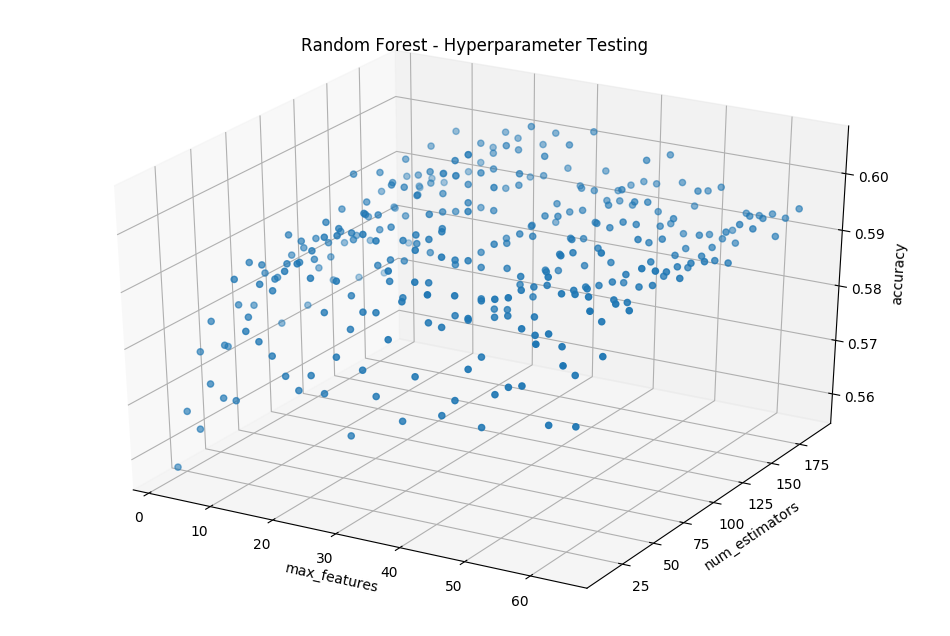

In [220]:
import re
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data for a three-dimensional scattered points
x = rf_results['max_features'].tolist()
y = rf_results['num_estimators'].tolist()     # test removing .tolist() on all three lines
z = rf_results['accuracy'].tolist()

# Creating figure
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(x, y, z, cmap = 'Greens')
plt.title("Random Forest - Hyperparameter Testing")
ax.set_xlabel('max_features')
ax.set_ylabel('num_estimators')
ax.set_zlabel('accuracy')

#Show the plot
plt.show()

In [221]:
# Sort results DataFrame
rf_results.sort_values(by = 'accuracy', ascending = False)

accuracy  max_features  num_estimators
125  0.604850          26.0           110.0
128  0.603815          26.0           170.0
127  0.602773          26.0           150.0
157  0.602088          32.0           150.0
158  0.601748          32.0           170.0
..        ...           ...             ...
40   0.572377          10.0            10.0
140  0.570303          30.0            10.0
10   0.568583           4.0            10.0
20   0.565811           6.0            10.0
0    0.557851           2.0            10.0

[320 rows x 3 columns]

### Neural Networks

In [336]:
# Import libraries
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SimpleRNN

In [337]:
# Finding the shape for input_dim
print(f"The shape of the dataset: {X_train.shape}")
dims = X_train.shape[1]
print(f'Dimensions:{dims}')

The shape of the dataset: (2895, 68)
Dimensions:68


In [563]:
# Building a multilayer neural network using Keras
model = Sequential()
model.add(Dense(68, input_dim = dims, activation = 'softmax'))
#model.add(SimpleRNN(68, activation = 'relu'))
#model.add(Dropout(.20))
model.add(Dense(34, activation = 'softmax'))
#model.add(Dense(1, activation = "softmax"))

In [564]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 68)                4692      
_________________________________________________________________
dense_92 (Dense)             (None, 34)                2346      
Total params: 7,038
Trainable params: 7,038
Non-trainable params: 0
_________________________________________________________________


In [565]:
optimizer = tf.keras.optimizers.Nadam(0.001)
# optimizer = tf.keras.optimizers.Adadelta(1.) # BEST!!!

In [566]:
# Compile the model to provide the training parameters
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [568]:
# Train the model
epoch = 300
history = model.fit(X_train, y_train, epochs = epoch, verbose = 1, validation_split = 0.15)

Train on 2460 samples, validate on 435 samples
Epoch 1/300
2460/2460 [==============================] - 0s 197us/sample - loss: 3.3857 - accuracy: 0.4138 - val_loss: 3.2346 - val_accuracy: 0.4667
Epoch 2/300
2460/2460 [==============================] - 0s 42us/sample - loss: 3.0877 - accuracy: 0.5126 - val_loss: 2.9355 - val_accuracy: 0.5540
Epoch 3/300
2460/2460 [==============================] - 0s 45us/sample - loss: 2.7890 - accuracy: 0.5382 - val_loss: 2.6358 - val_accuracy: 0.5678
Epoch 4/300
2460/2460 [==============================] - 0s 42us/sample - loss: 2.4909 - accuracy: 0.5520 - val_loss: 2.3375 - val_accuracy: 0.5563
Epoch 5/300
2460/2460 [==============================] - 0s 41us/sample - loss: 2.1969 - accuracy: 0.5585 - val_loss: 2.0470 - val_accuracy: 0.5517
Epoch 6/300
2460/2460 [==============================] - 0s 33us/sample - loss: 1.9160 - accuracy: 0.5610 - val_loss: 1.7762 - val_accuracy: 0.5517
Epoch 7/300
2460/2460 [==============================] - 0s 34us

In [577]:
# Evaluate the trained model
model_eval = model.evaluate(X_train, y_train)
print(f"The accuracy of the model is: {model_eval[1]}")
print(f"The loss of the model is: {round(model_eval[0], 4)}")

2895/2895 [==============================] - 0s 41us/sample - loss: 0.4372 - accuracy: 0.8114
The accuracy of the model is: 0.811398983001709
The loss of the model is: 0.4372


In [570]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict_classes(X_test)

print(accuracy_score(y_test, y_test_pred))

0.6588397790055248


In [672]:
score_train = model.evaluate(X_train, y_train, verbose=0)

In [673]:
score_train

[0.5372486103795765, 0.7620035]

In [674]:
# Define function to get model performance (RMSE)
def get_model_perf(model_obj):

    score_train = model_obj.evaluate(X_train, y_train, verbose=0)
    print('Train RMSE: %.2f RMSE' % (math.sqrt(score_train[0])))

    score_test = model_obj.evaluate(X_test, y_test, verbose=0)
    print('Test RMSE: %.2f RMSE' % (math.sqrt(score_test[0])))

In [675]:
get_model_perf(model)

Train RMSE: 0.73 RMSE
Test RMSE: 1.00 RMSE


In [571]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [637]:
val = history.history['val_loss']
loss = history.history['loss']

In [642]:
avgval = sum(history.history['loss']) / len(history.history['loss'])

In [643]:
avgval

0.6078234545300157

In [654]:
print(history.params)

{'batch_size': 32, 'epochs': 300, 'steps': 77, 'samples': 2460, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}


In [574]:
print(dir(history))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_keras_api_names', '_keras_api_names_v1', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


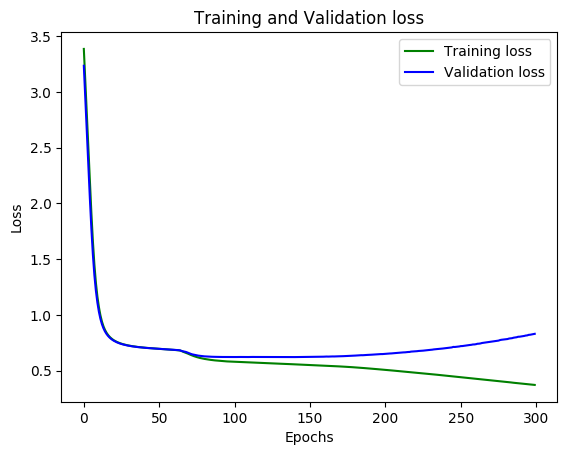

In [575]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0, epoch)
plt.plot(epochs, loss_train, 'g', label = 'Training loss')
plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
#plt.title("Optimizer: %s Learning Rate: %f" % (opt, lr))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

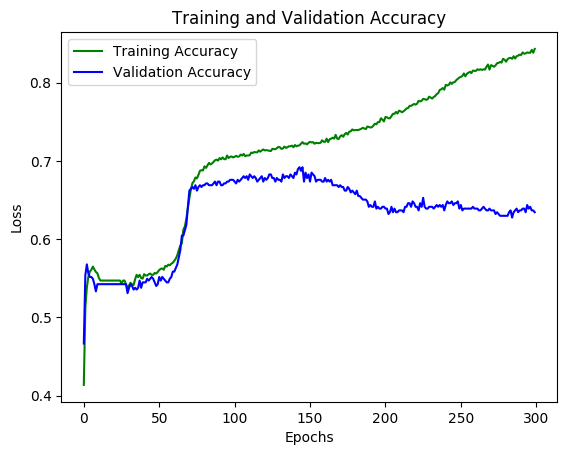

In [576]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0, epoch)
plt.plot(epochs, loss_train, 'g', label = 'Training Accuracy')
plt.plot(epochs, loss_val, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Loop - Neural Network

In [626]:
def select_optimizer(optimize, learn):
    """Used to select an optimizer and learning rate. """
    optimizer_dict = {'Adam': tf.optimizers.Adam(learning_rate = learn),
                      'SGD': tf.optimizers.SGD(learning_rate = learn),
                      'Adadelta': tf.optimizers.Adadelta(learning_rate = learn),
                      'RMSprop': tf.optimizers.RMSprop(learning_rate = learn),
                      'Adagrad': tf.optimizers.Adagrad(learning_rate = learn),
                      'Adamax': tf.optimizers.Adamax(learning_rate = learn),
                      'Nadam': tf.optimizers.Nadam(learning_rate = learn),
                      'Ftrl': tf.optimizers.Ftrl(learning_rate = learn),
                      }
    x = optimizer_dict[optimize]
    return x

In [676]:
# Define function to get model performance (RMSE)
def get_rmse(model_obj):

    score_train = model_obj.evaluate(X_train, y_train, verbose=0)
    print('Train RMSE: %.2f RMSE' % (math.sqrt(score_train[0])))

    score_test = model_obj.evaluate(X_test, y_test, verbose=0)
    print('Test RMSE: %.2f RMSE' % (math.sqrt(score_test[0])))

2895/2895 [==============================] - 0s 21us/sample - loss: 0.5501 - accuracy: 0.7102


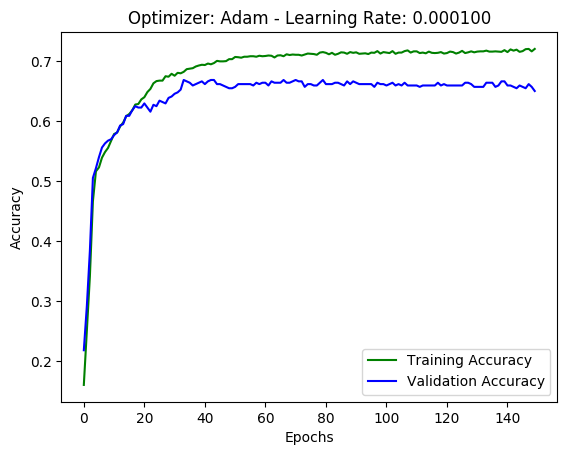

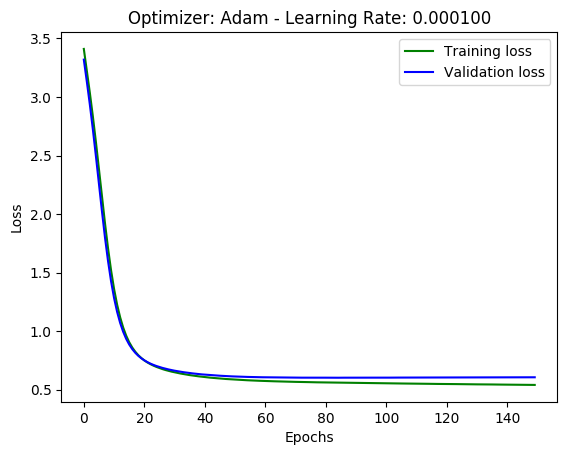

The training accuracyis: 0.7101899981498718
The training loss is: 0.5501420887640721
The test sccuracy is: 0.6767955801104972
Train RMSE: 0.74 RMSE
Test RMSE: 0.77 RMSE

2895/2895 [==============================] - 0s 21us/sample - loss: 0.3339 - accuracy: 0.8794


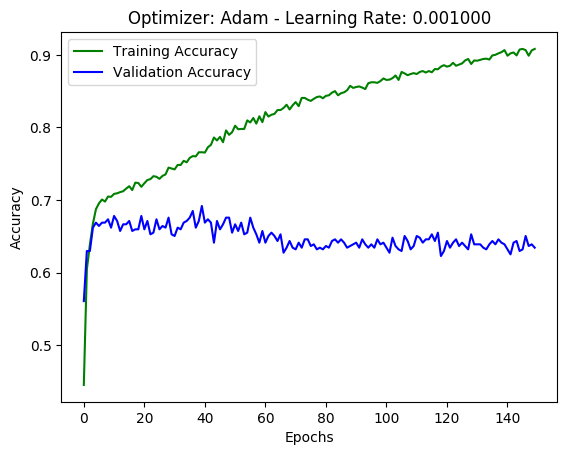

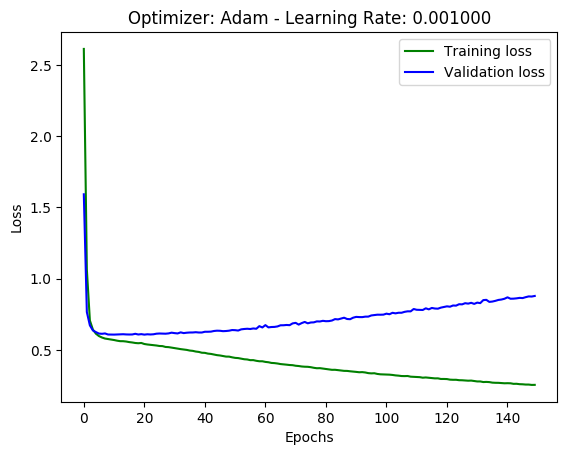

The training accuracyis: 0.879447340965271
The training loss is: 0.3338682867908313
The test sccuracy is: 0.611878453038674
Train RMSE: 0.58 RMSE
Test RMSE: 0.96 RMSE

2895/2895 [==============================] - 0s 16us/sample - loss: 0.5103 - accuracy: 0.9188


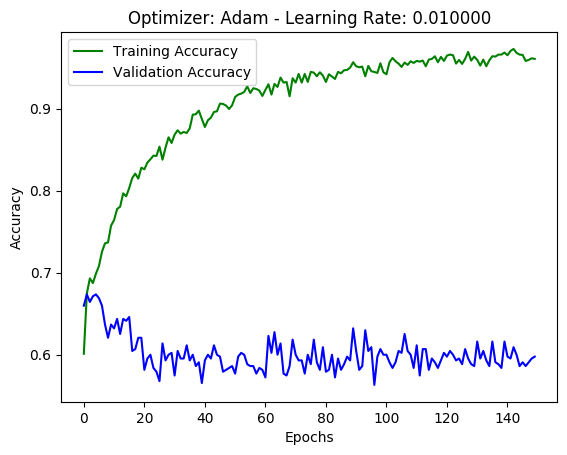

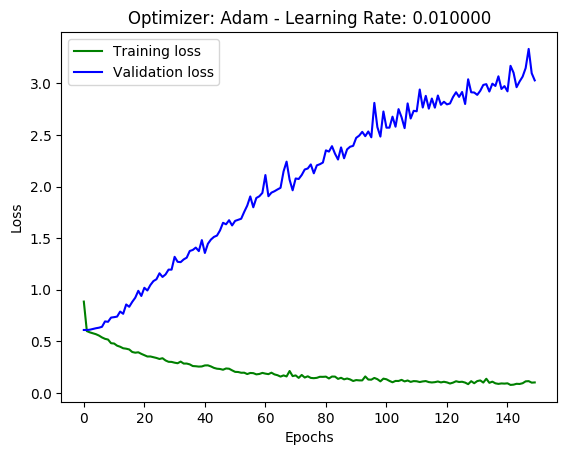

The training accuracyis: 0.9188255667686462
The training loss is: 0.51025721413278
The test sccuracy is: 0.6022099447513812
Train RMSE: 0.71 RMSE
Test RMSE: 1.73 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 0.8558 - accuracy: 0.7679


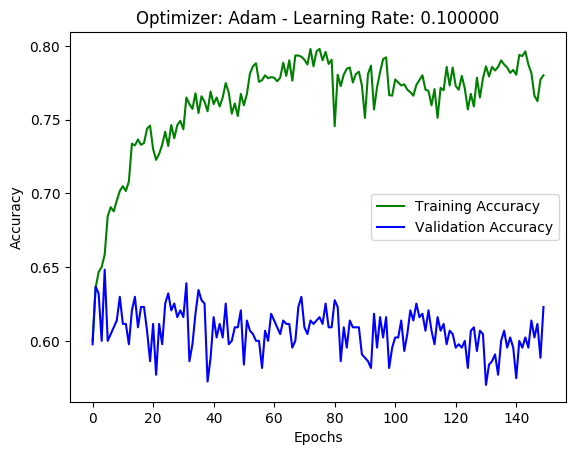

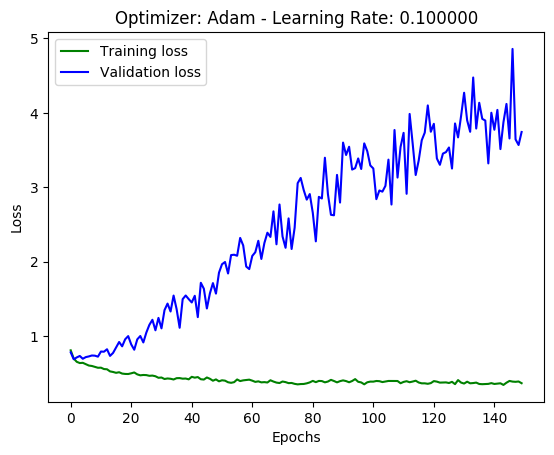

The training accuracyis: 0.7678756713867188
The training loss is: 0.8558219762251991
The test sccuracy is: 0.6353591160220995
Train RMSE: 0.93 RMSE
Test RMSE: 1.82 RMSE

2895/2895 [==============================] - 0s 20us/sample - loss: 0.6952 - accuracy: 0.4535


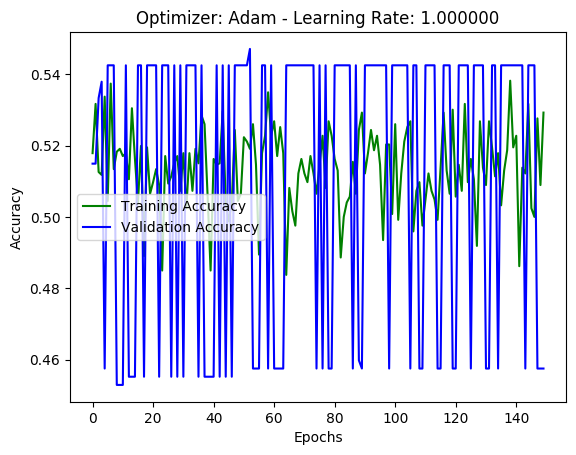

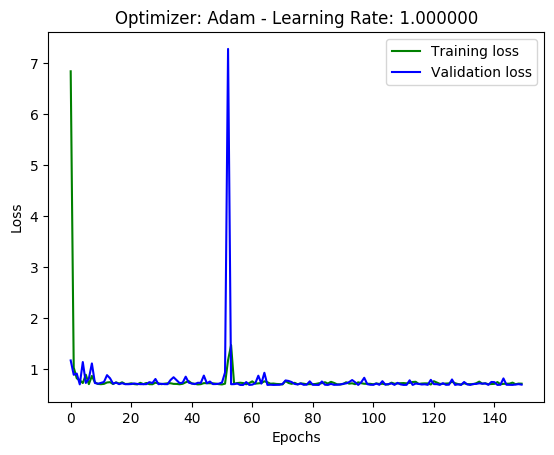

The training accuracyis: 0.4535405933856964
The training loss is: 0.6952483983237508
The test sccuracy is: 0.4281767955801105
Train RMSE: 0.83 RMSE
Test RMSE: 0.83 RMSE

2895/2895 [==============================] - 0s 21us/sample - loss: 2.0708 - accuracy: 0.5437


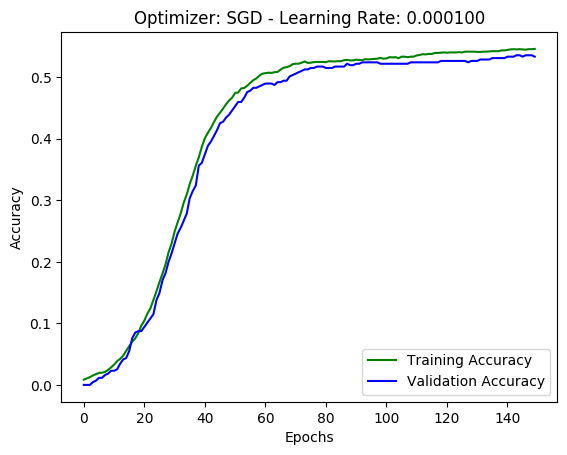

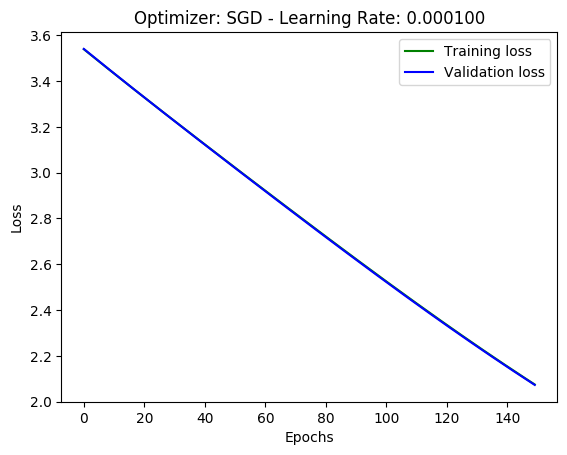

The training accuracyis: 0.5436960458755493
The training loss is: 2.0708077533669216
The test sccuracy is: 0.5607734806629834
Train RMSE: 1.44 RMSE
Test RMSE: 1.44 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.6750 - accuracy: 0.6245


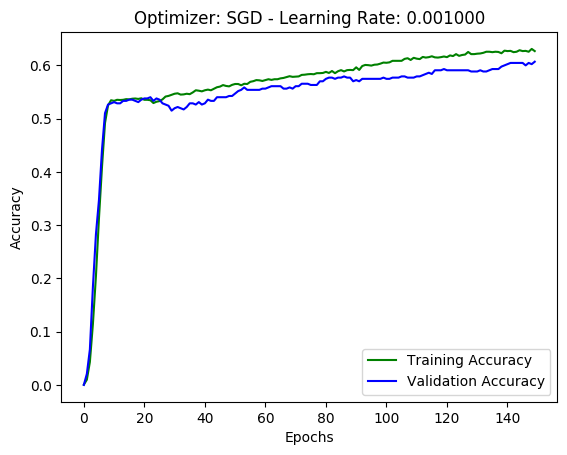

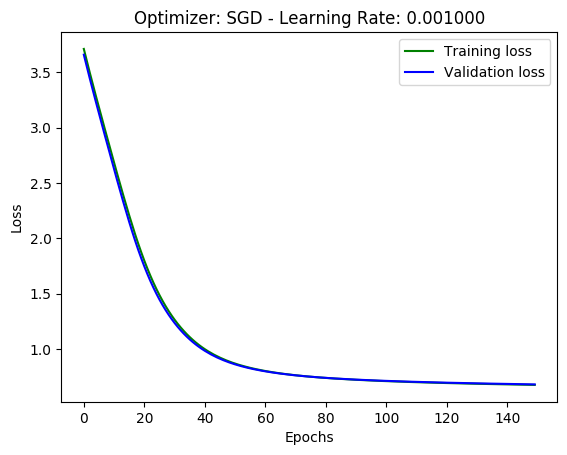

The training accuracyis: 0.6245250701904297
The training loss is: 0.6749934508598736
The test sccuracy is: 0.6339779005524862
Train RMSE: 0.82 RMSE
Test RMSE: 0.82 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.5643 - accuracy: 0.7057


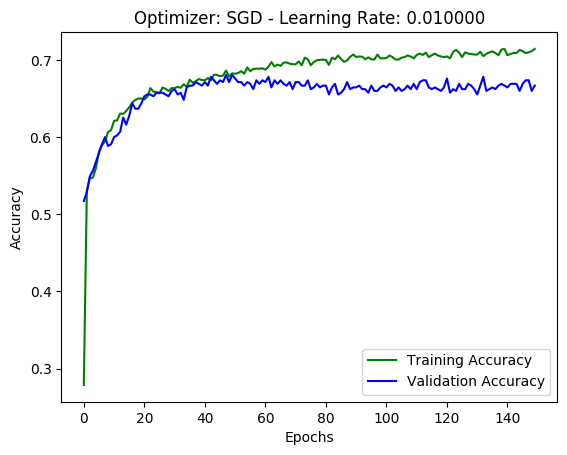

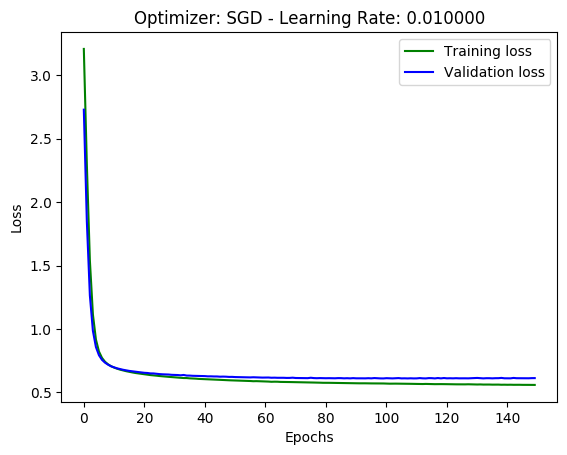

The training accuracyis: 0.7056995034217834
The training loss is: 0.5643123291728822
The test sccuracy is: 0.6740331491712708
Train RMSE: 0.75 RMSE
Test RMSE: 0.78 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.7667 - accuracy: 0.7168


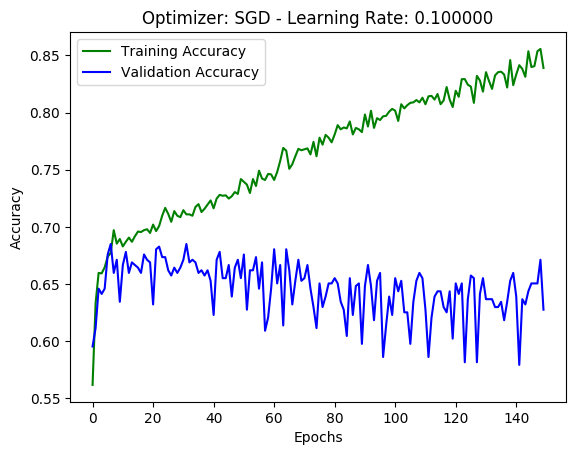

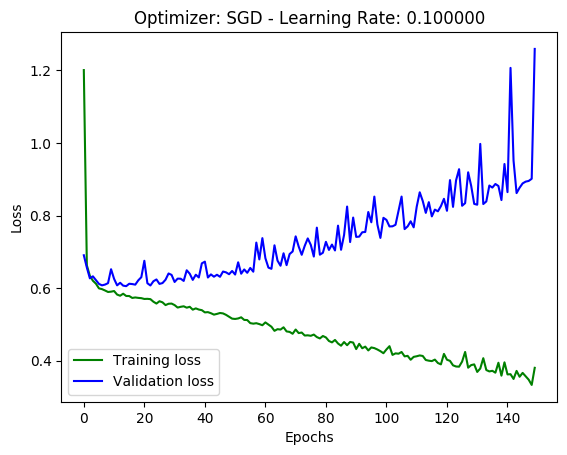

The training accuracyis: 0.7167530059814453
The training loss is: 0.7667442126595294
The test sccuracy is: 0.580110497237569
Train RMSE: 0.88 RMSE
Test RMSE: 1.15 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 0.4994 - accuracy: 0.8746


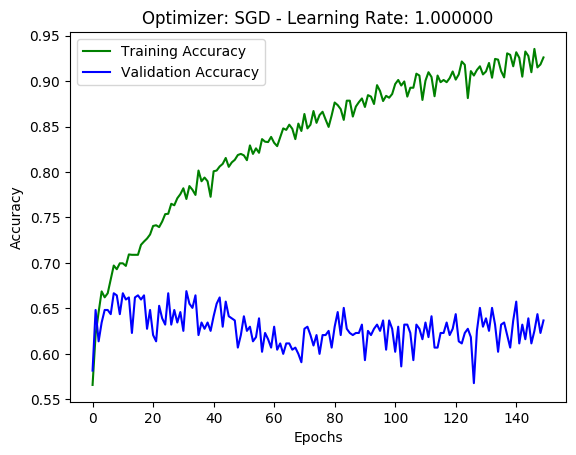

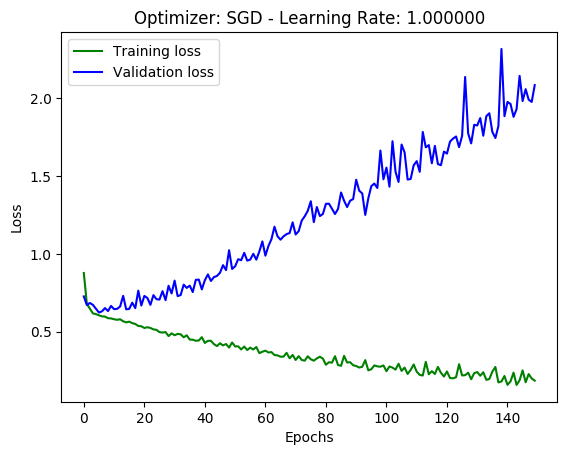

The training accuracyis: 0.8746113777160645
The training loss is: 0.4993959021691831
The test sccuracy is: 0.6022099447513812
Train RMSE: 0.71 RMSE
Test RMSE: 1.47 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 3.6123 - accuracy: 0.0038


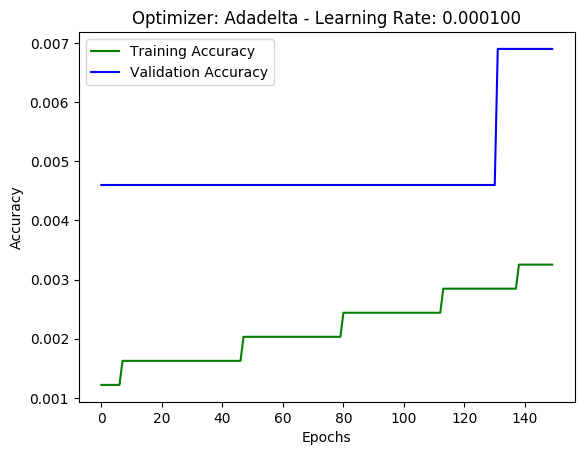

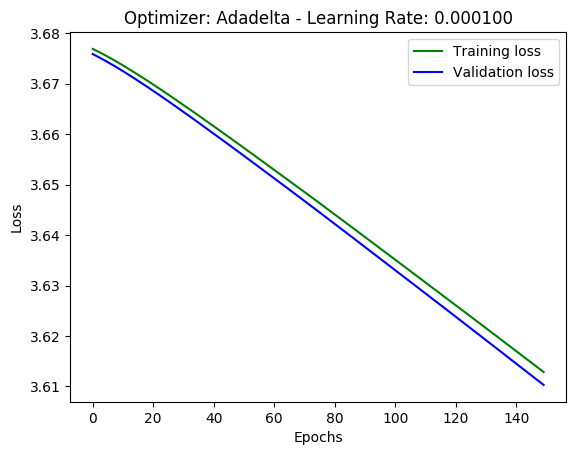

The training accuracyis: 0.003799654543399811
The training loss is: 3.612289610386718
The test sccuracy is: 0.004143646408839779
Train RMSE: 1.90 RMSE
Test RMSE: 1.90 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 2.8420 - accuracy: 0.5458


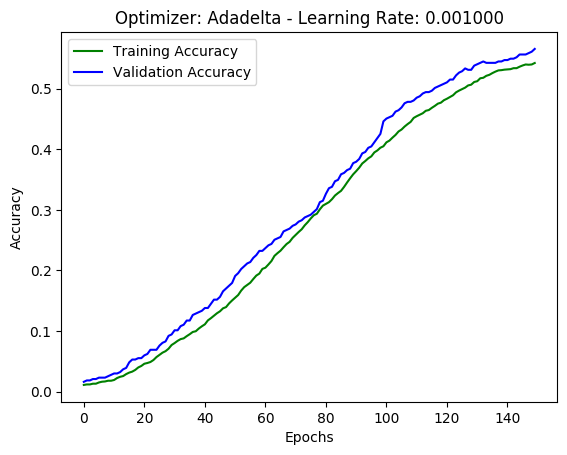

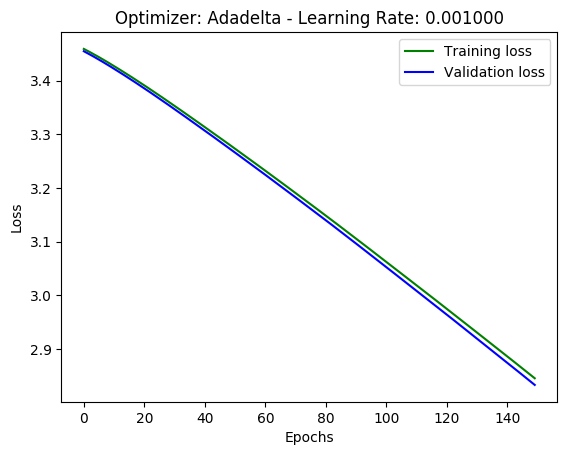

The training accuracyis: 0.5457685589790344
The training loss is: 2.841974959184057
The test sccuracy is: 0.5207182320441989
Train RMSE: 1.69 RMSE
Test RMSE: 1.69 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.6712 - accuracy: 0.6359


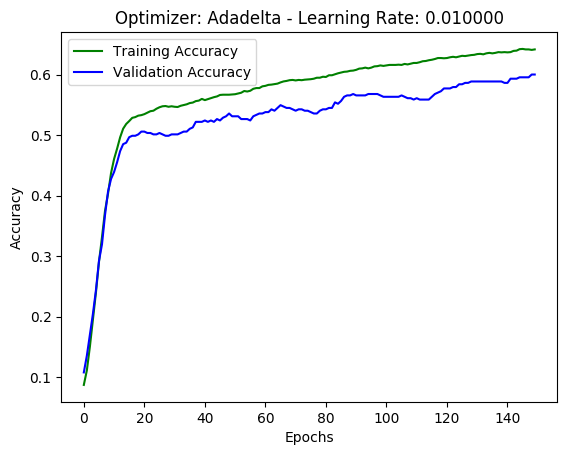

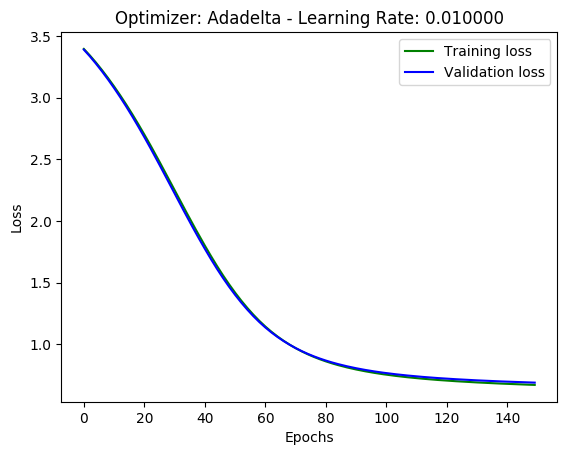

The training accuracyis: 0.6359239816665649
The training loss is: 0.6711859399172926
The test sccuracy is: 0.6325966850828729
Train RMSE: 0.82 RMSE
Test RMSE: 0.82 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.5540 - accuracy: 0.7116


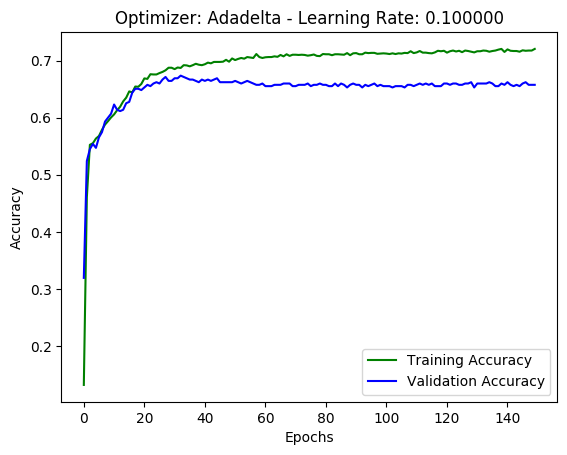

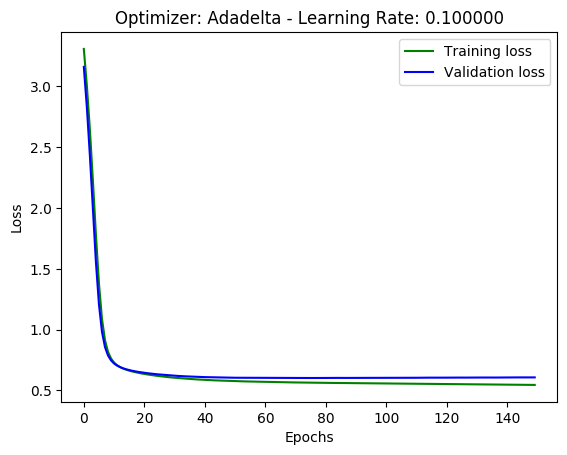

The training accuracyis: 0.7115716934204102
The training loss is: 0.554040841467434
The test sccuracy is: 0.6726519337016574
Train RMSE: 0.74 RMSE
Test RMSE: 0.77 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.3932 - accuracy: 0.8366


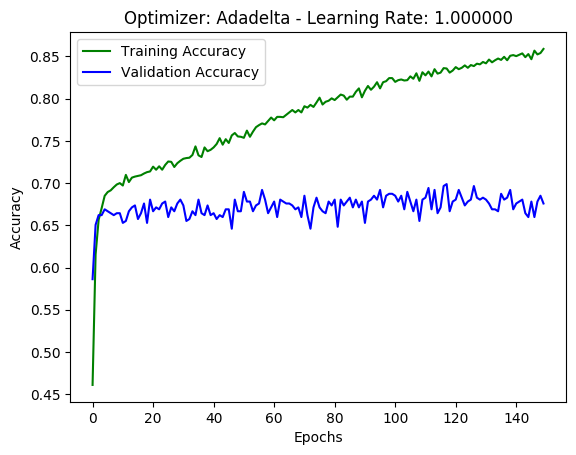

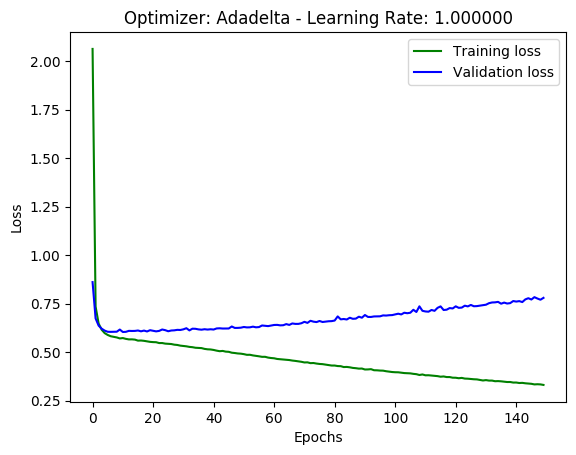

The training accuracyis: 0.8366148471832275
The training loss is: 0.3932062915775648
The test sccuracy is: 0.6146408839779005
Train RMSE: 0.63 RMSE
Test RMSE: 0.90 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 0.5596 - accuracy: 0.7064


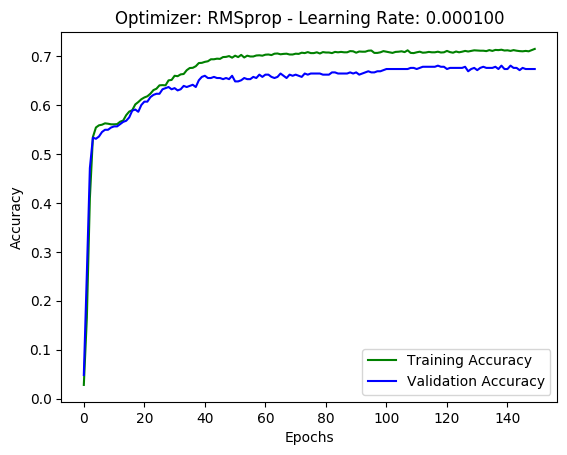

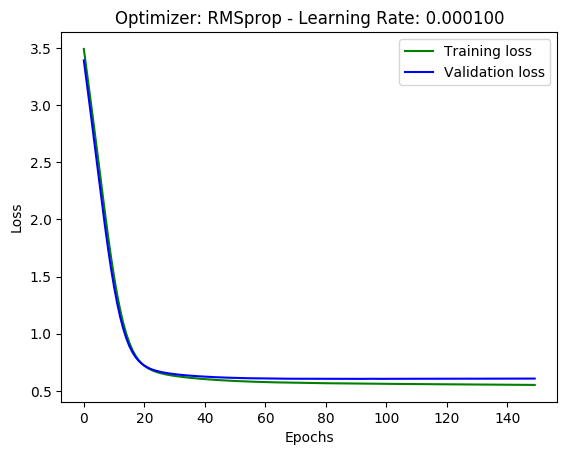

The training accuracyis: 0.7063903212547302
The training loss is: 0.5596345086377725
The test sccuracy is: 0.6657458563535912
Train RMSE: 0.75 RMSE
Test RMSE: 0.78 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 0.4013 - accuracy: 0.8325


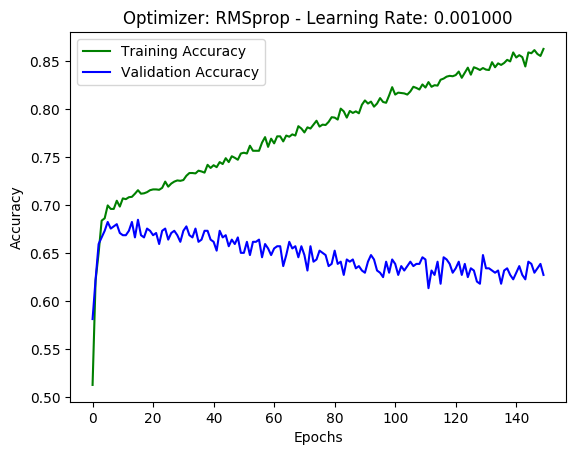

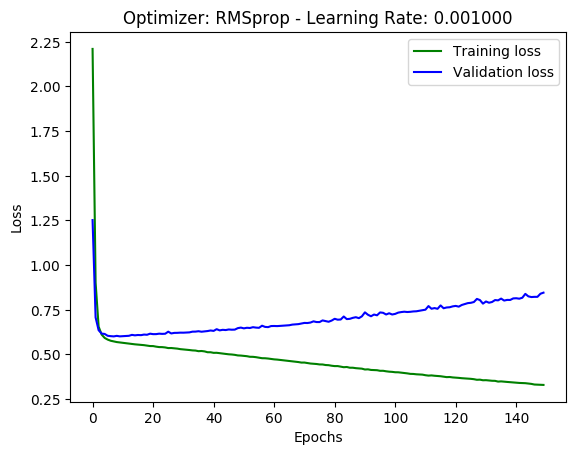

The training accuracyis: 0.8324697613716125
The training loss is: 0.4013347346547972
The test sccuracy is: 0.6256906077348067
Train RMSE: 0.63 RMSE
Test RMSE: 0.90 RMSE

2895/2895 [==============================] - 0s 20us/sample - loss: 0.6750 - accuracy: 0.9247


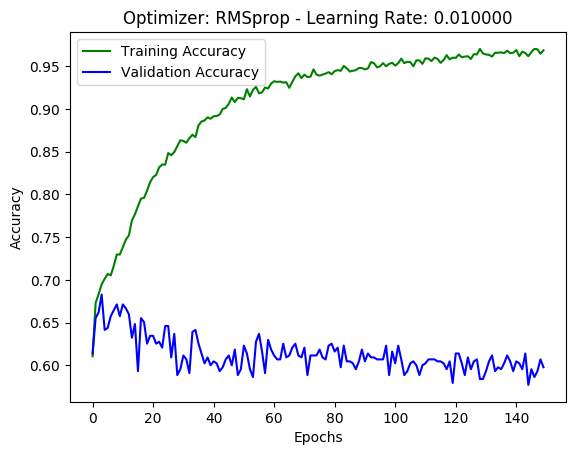

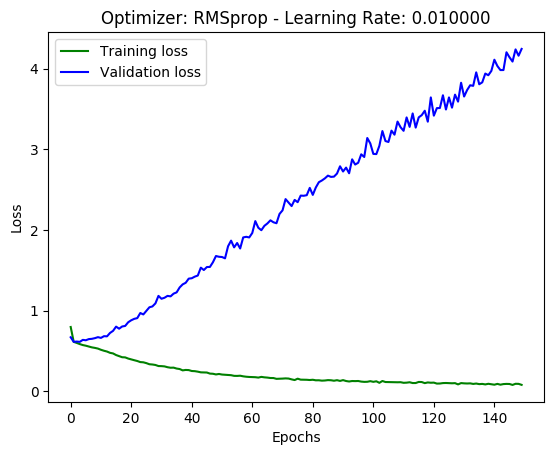

The training accuracyis: 0.924697756767273
The training loss is: 0.674972617484642
The test sccuracy is: 0.5814917127071824
Train RMSE: 0.82 RMSE
Test RMSE: 2.01 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 1.0978 - accuracy: 0.7855


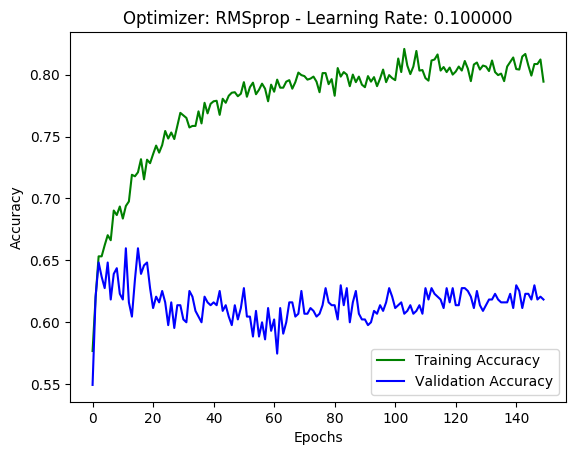

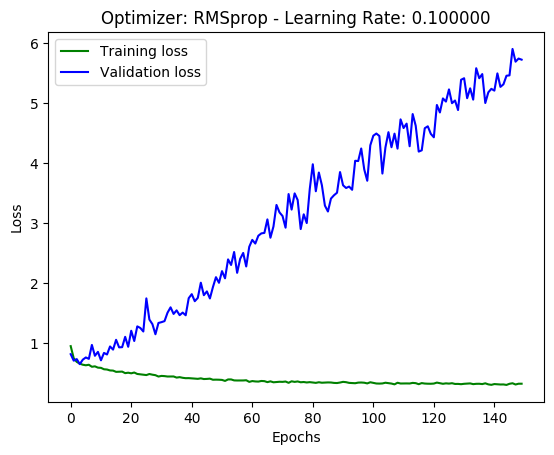

The training accuracyis: 0.7854922413825989
The training loss is: 1.0977516037606616
The test sccuracy is: 0.5662983425414365
Train RMSE: 1.05 RMSE
Test RMSE: 2.12 RMSE

2895/2895 [==============================] - 0s 20us/sample - loss: 0.7920 - accuracy: 0.4528


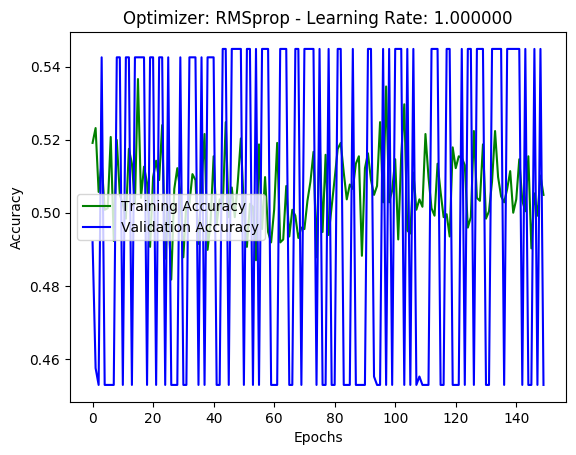

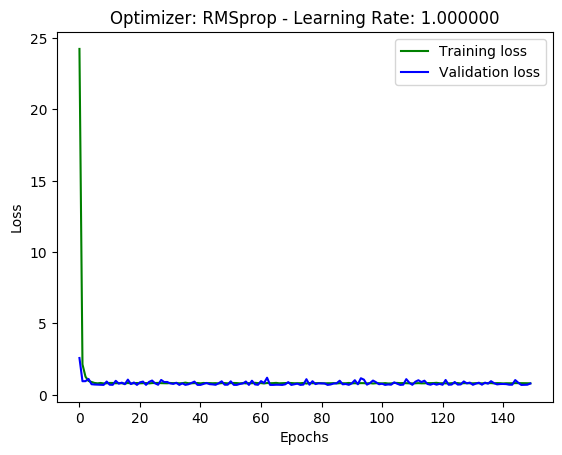

The training accuracyis: 0.45284974575042725
The training loss is: 0.7919575575102179
The test sccuracy is: 0.430939226519337
Train RMSE: 0.89 RMSE
Test RMSE: 0.90 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 3.0583 - accuracy: 0.3541


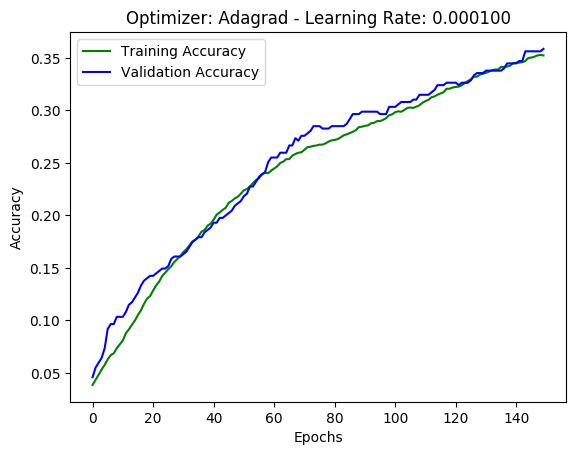

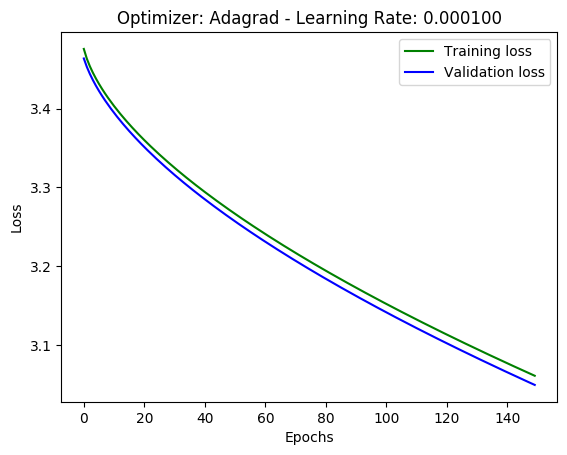

The training accuracyis: 0.35405871272087097
The training loss is: 3.0582619361515078
The test sccuracy is: 0.3729281767955801
Train RMSE: 1.75 RMSE
Test RMSE: 1.75 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.7598 - accuracy: 0.6470


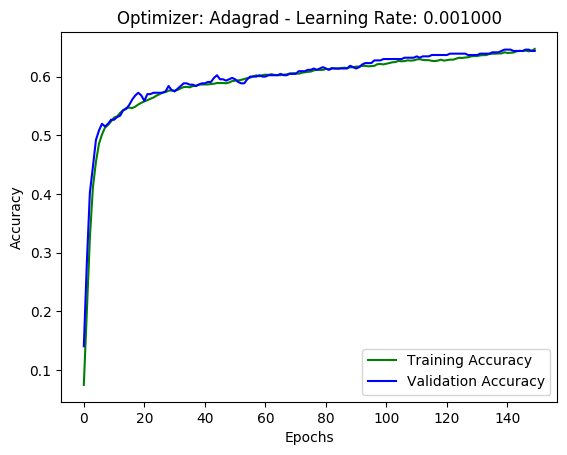

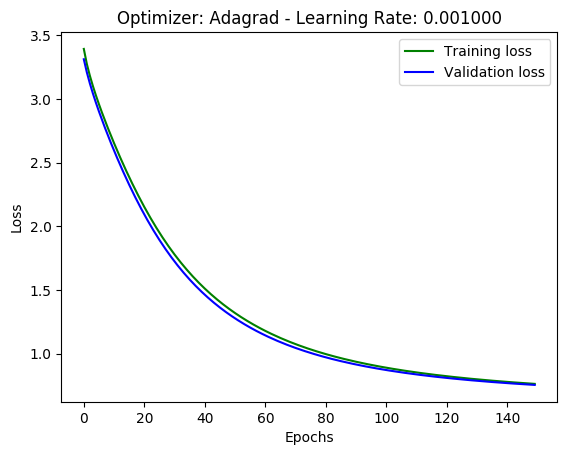

The training accuracyis: 0.6469775438308716
The training loss is: 0.759750299688448
The test sccuracy is: 0.6519337016574586
Train RMSE: 0.87 RMSE
Test RMSE: 0.87 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.5567 - accuracy: 0.7098


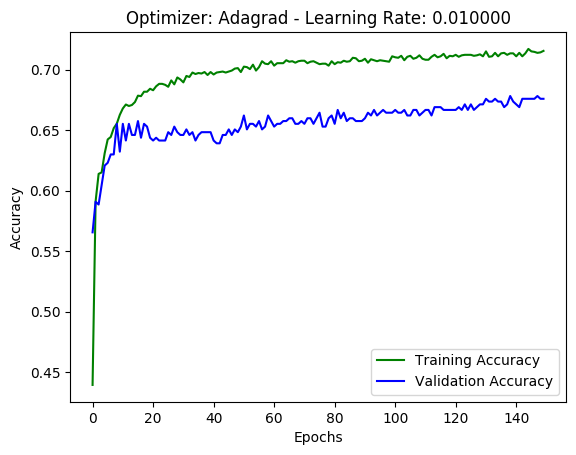

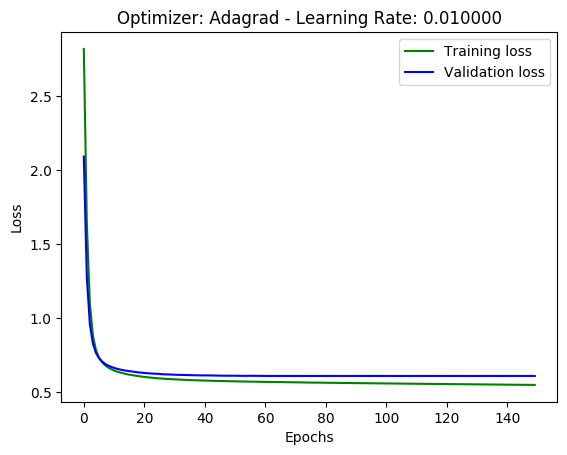

The training accuracyis: 0.7098445892333984
The training loss is: 0.5566953678205223
The test sccuracy is: 0.6685082872928176
Train RMSE: 0.75 RMSE
Test RMSE: 0.77 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.3508 - accuracy: 0.8832


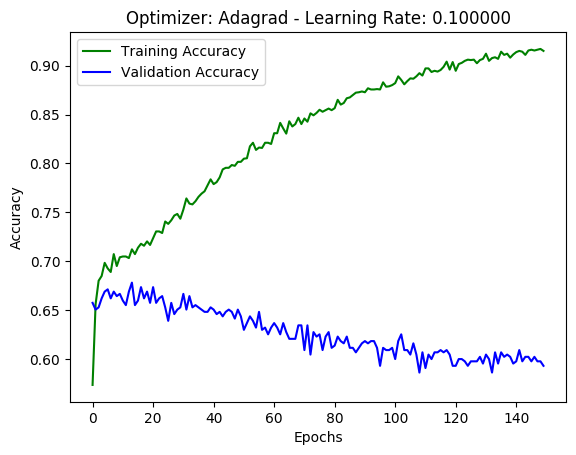

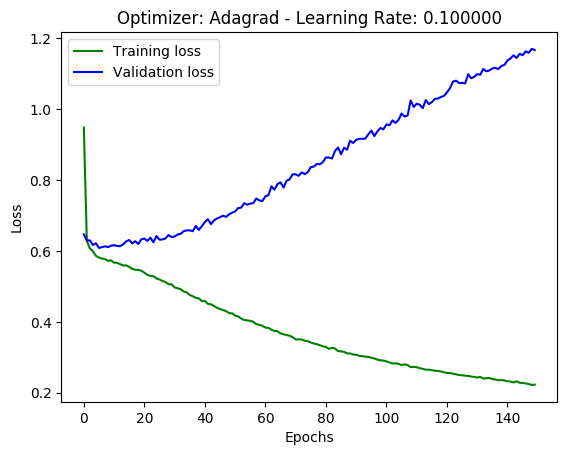

The training accuracyis: 0.8832469582557678
The training loss is: 0.35084039666697975
The test sccuracy is: 0.5966850828729282
Train RMSE: 0.59 RMSE
Test RMSE: 1.07 RMSE

2895/2895 [==============================] - 0s 20us/sample - loss: 0.5737 - accuracy: 0.9161


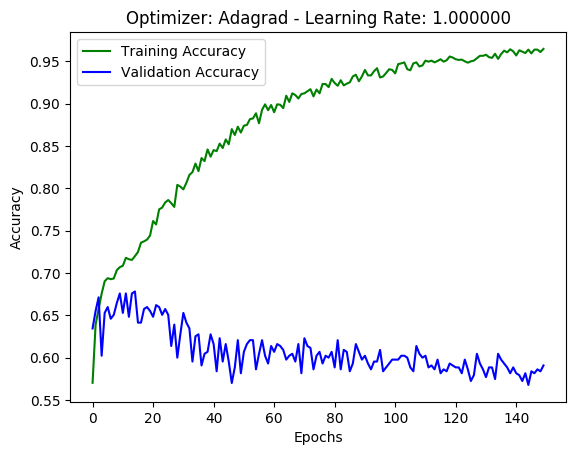

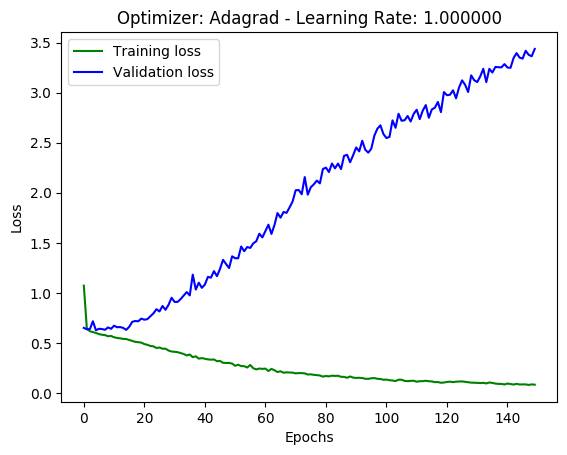

The training accuracyis: 0.9160621762275696
The training loss is: 0.5737243854371583
The test sccuracy is: 0.6104972375690608
Train RMSE: 0.76 RMSE
Test RMSE: 1.73 RMSE

2895/2895 [==============================] - 0s 19us/sample - loss: 0.5814 - accuracy: 0.7009


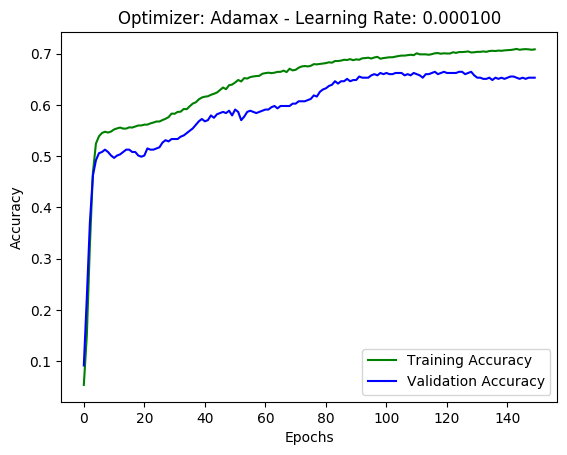

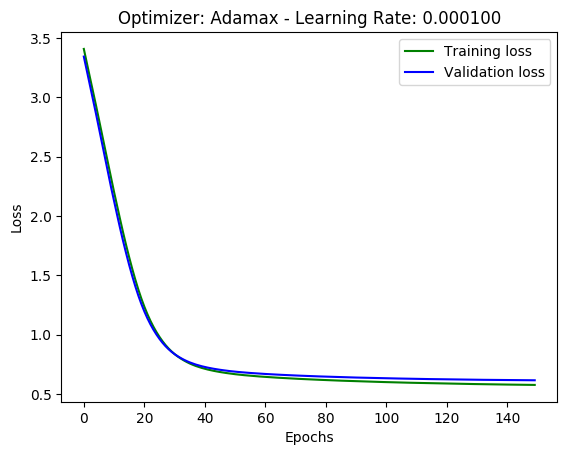

The training accuracyis: 0.7008635401725769
The training loss is: 0.5813825235053871
The test sccuracy is: 0.6726519337016574
Train RMSE: 0.76 RMSE
Test RMSE: 0.78 RMSE

2895/2895 [==============================] - 0s 22us/sample - loss: 0.4902 - accuracy: 0.7617


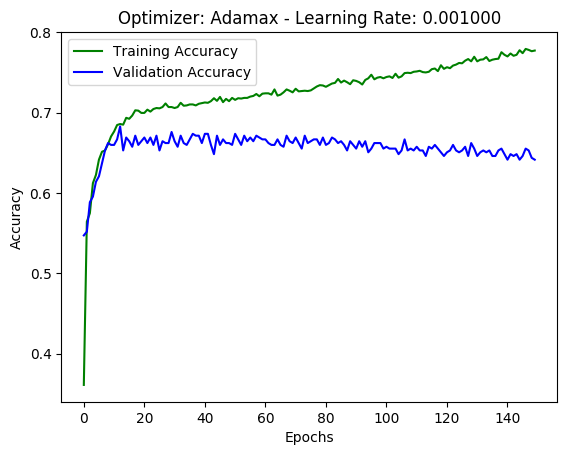

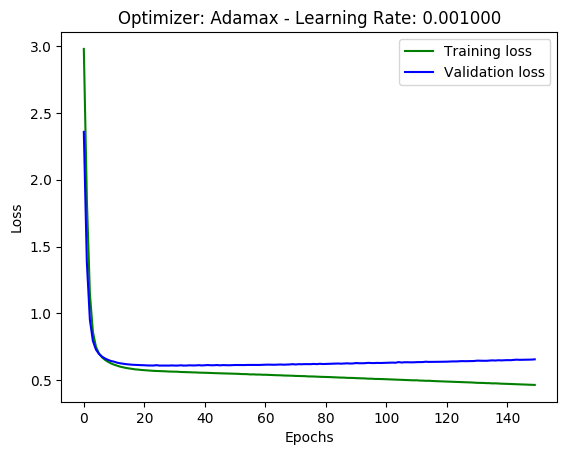

The training accuracyis: 0.7616580128669739
The training loss is: 0.49024090003061377
The test sccuracy is: 0.6616022099447514
Train RMSE: 0.70 RMSE
Test RMSE: 0.80 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.3318 - accuracy: 0.9130


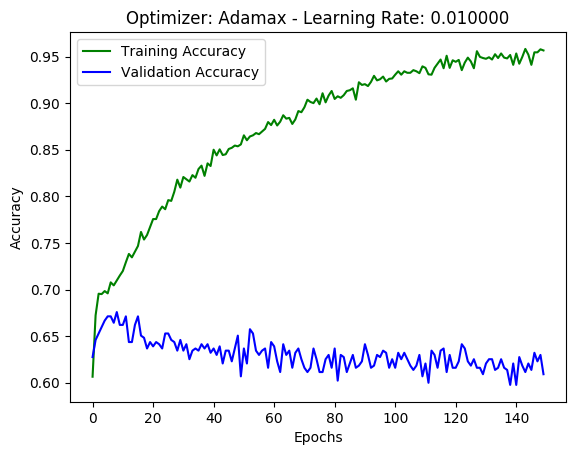

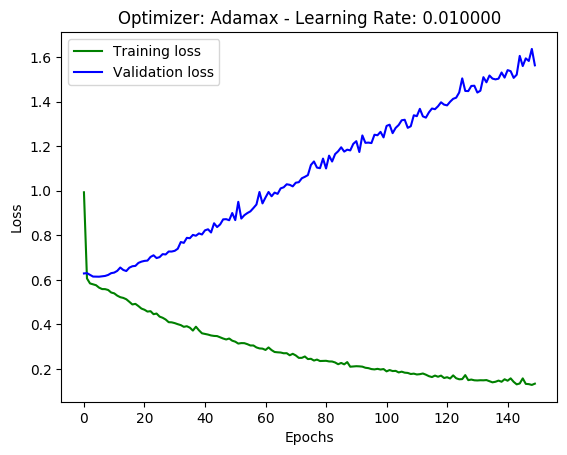

The training accuracyis: 0.9129533767700195
The training loss is: 0.33182536139183505
The test sccuracy is: 0.6187845303867403
Train RMSE: 0.58 RMSE
Test RMSE: 1.26 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.6853 - accuracy: 0.9250


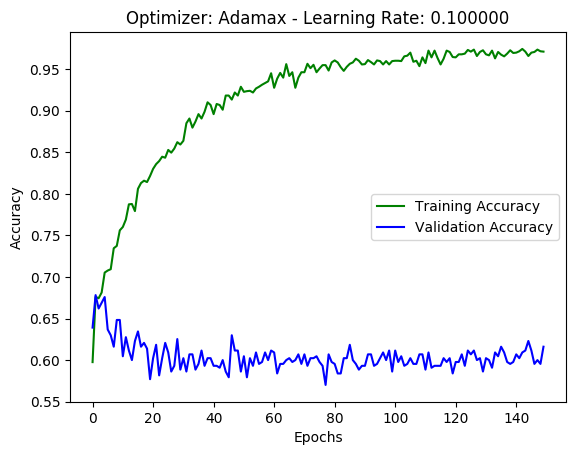

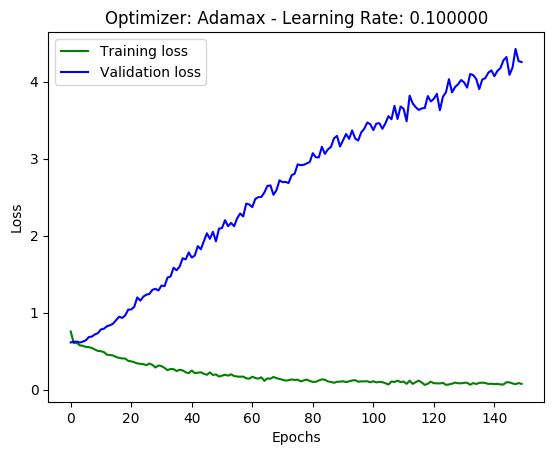

The training accuracyis: 0.9250431656837463
The training loss is: 0.6853072049138048
The test sccuracy is: 0.6174033149171271
Train RMSE: 0.83 RMSE
Test RMSE: 1.93 RMSE

2895/2895 [==============================] - 0s 23us/sample - loss: 0.8124 - accuracy: 0.7130


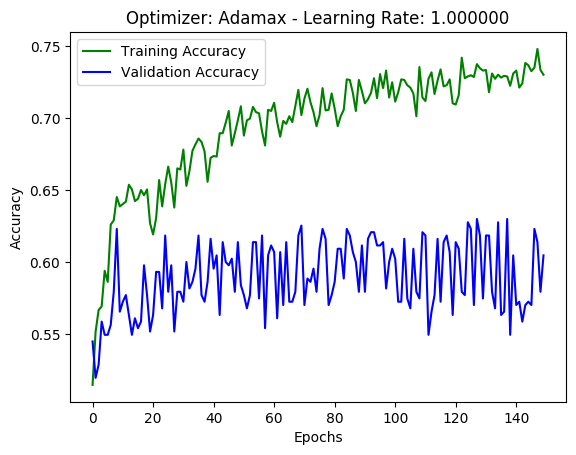

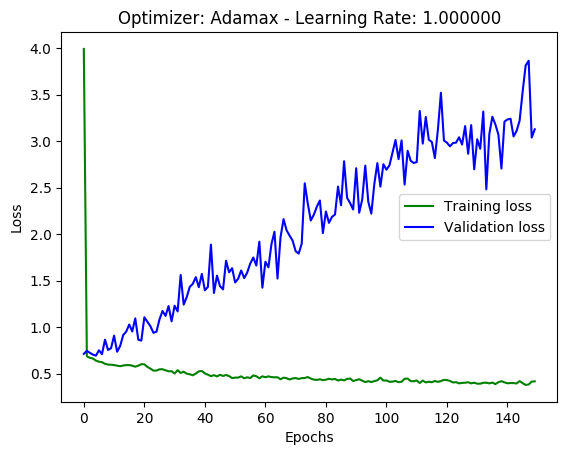

The training accuracyis: 0.7129533886909485
The training loss is: 0.8123617605430062
The test sccuracy is: 0.6146408839779005
Train RMSE: 0.90 RMSE
Test RMSE: 1.74 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.5515 - accuracy: 0.7126


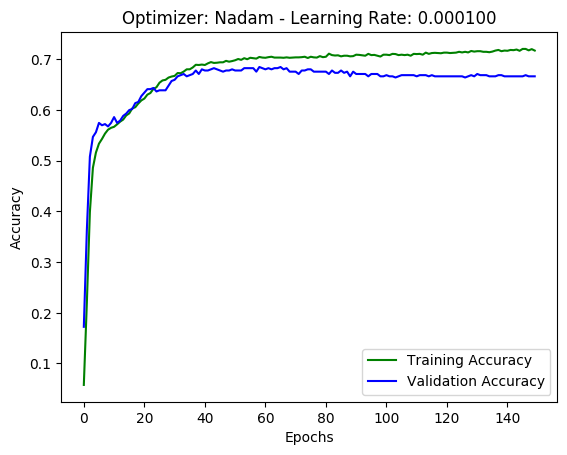

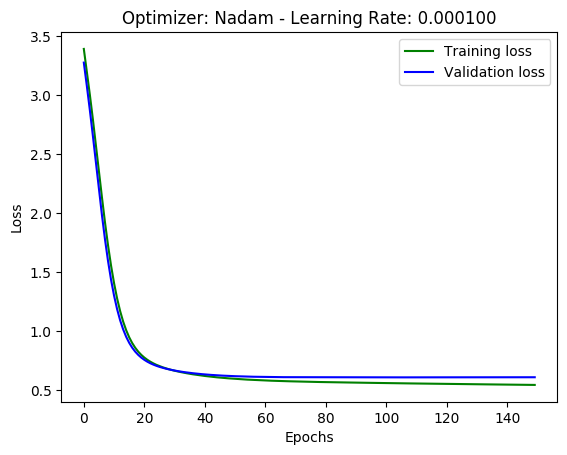

The training accuracyis: 0.7126079201698303
The training loss is: 0.5515411238802118
The test sccuracy is: 0.6712707182320442
Train RMSE: 0.74 RMSE
Test RMSE: 0.77 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.3577 - accuracy: 0.8718


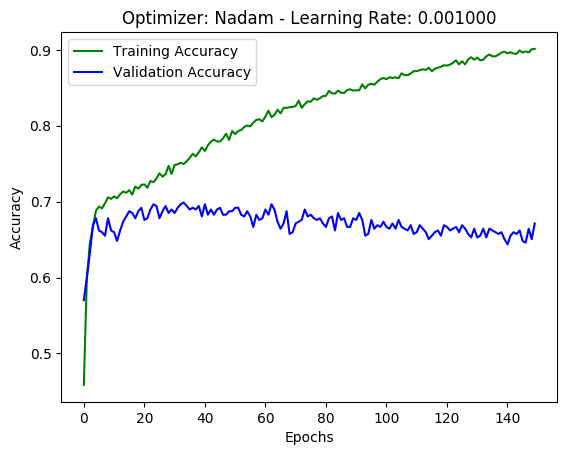

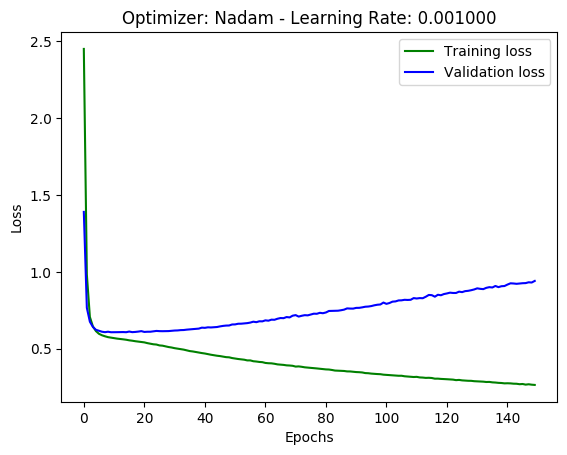

The training accuracyis: 0.8718479871749878
The training loss is: 0.35770991659740914
The test sccuracy is: 0.6215469613259669
Train RMSE: 0.60 RMSE
Test RMSE: 0.96 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.5784 - accuracy: 0.9181


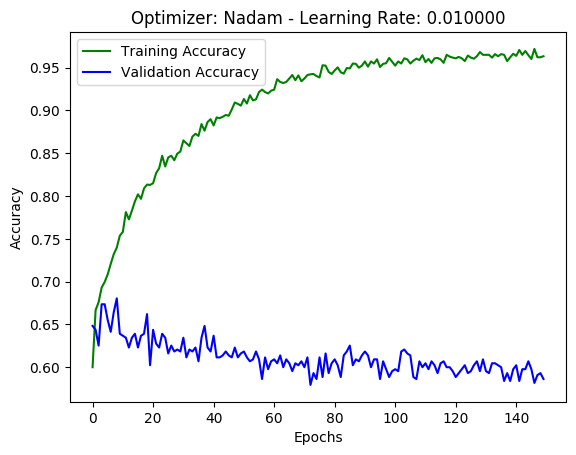

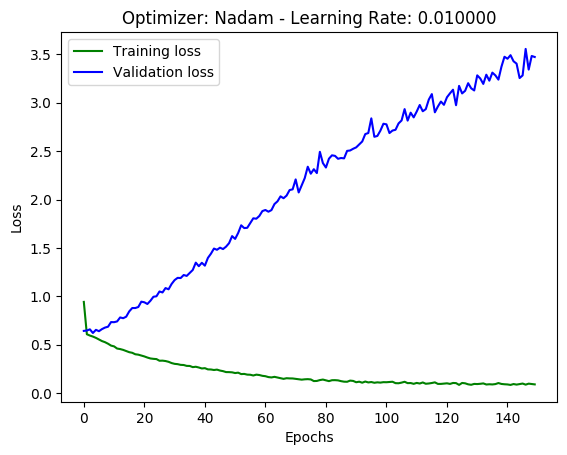

The training accuracyis: 0.9181346893310547
The training loss is: 0.5784296746647214
The test sccuracy is: 0.5911602209944752
Train RMSE: 0.76 RMSE
Test RMSE: 1.84 RMSE

2895/2895 [==============================] - 0s 33us/sample - loss: 0.8599 - accuracy: 0.7551


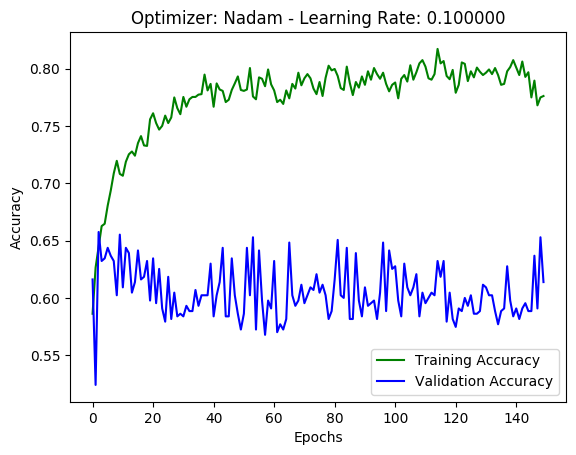

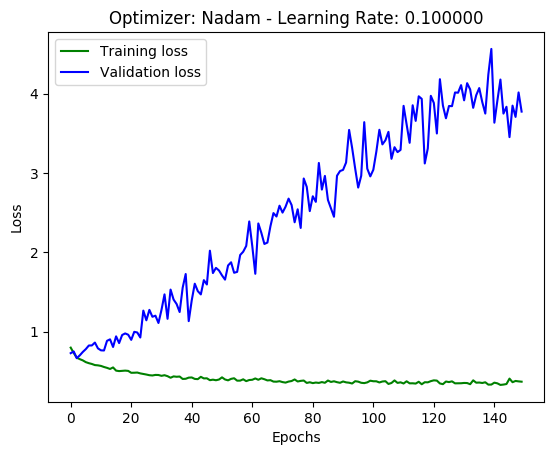

The training accuracyis: 0.7550950050354004
The training loss is: 0.8599370281107479
The test sccuracy is: 0.5662983425414365
Train RMSE: 0.93 RMSE
Test RMSE: 1.82 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 0.7077 - accuracy: 0.4535


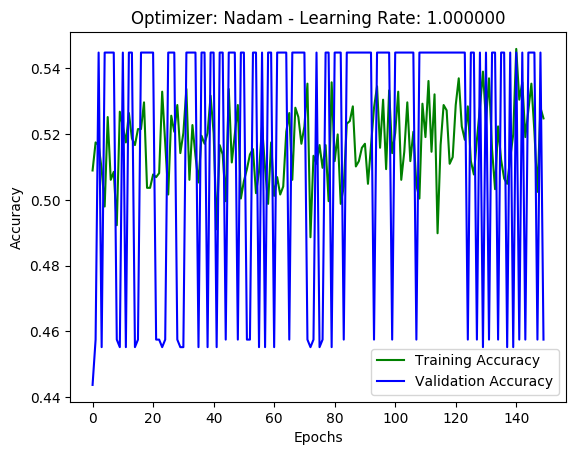

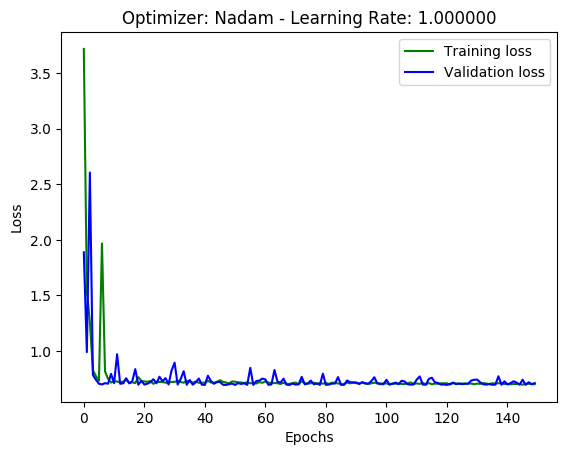

The training accuracyis: 0.4535405933856964
The training loss is: 0.7076526505341801
The test sccuracy is: 0.4281767955801105
Train RMSE: 0.84 RMSE
Test RMSE: 0.86 RMSE

2895/2895 [==============================] - 0s 17us/sample - loss: 3.4809 - accuracy: 0.5461


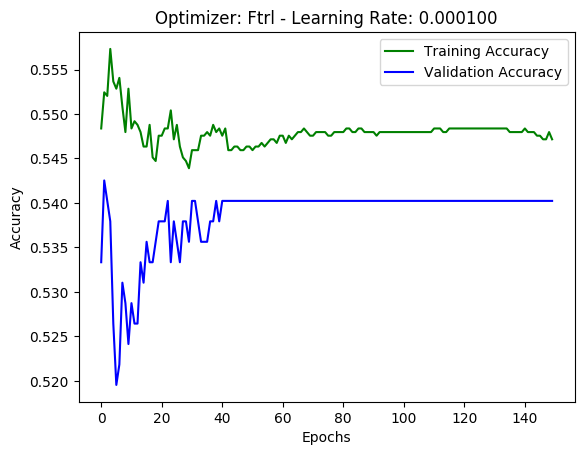

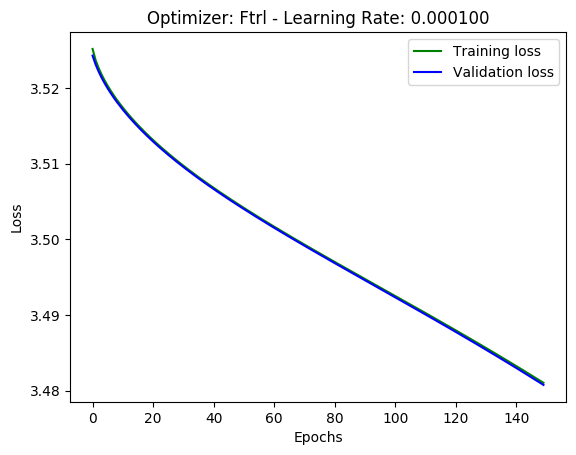

The training accuracyis: 0.5461139678955078
The training loss is: 3.4808780700637474
The test sccuracy is: 0.5580110497237569
Train RMSE: 1.87 RMSE
Test RMSE: 1.87 RMSE

2895/2895 [==============================] - 0s 23us/sample - loss: 0.8822 - accuracy: 0.5440


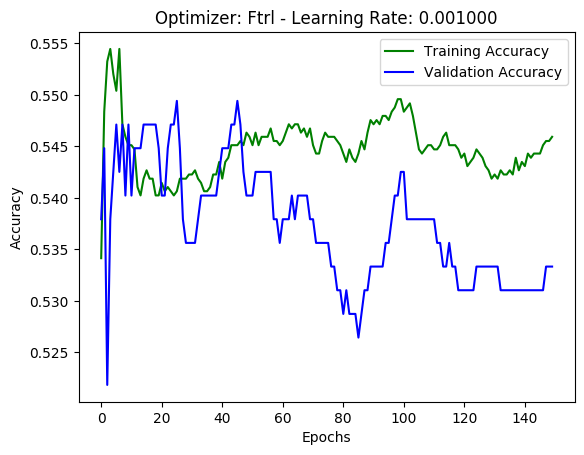

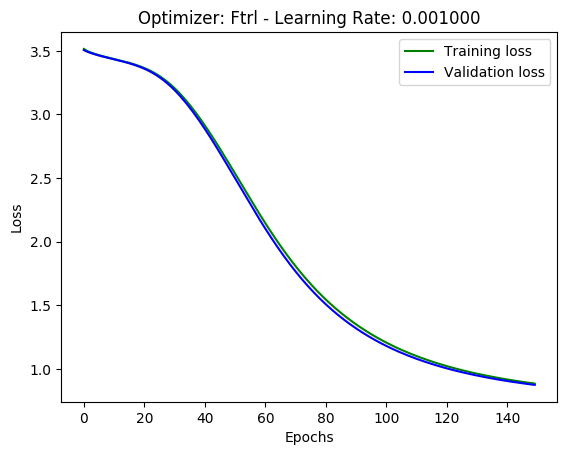

The training accuracyis: 0.5440414547920227
The training loss is: 0.8822079490091722
The test sccuracy is: 0.5773480662983426
Train RMSE: 0.94 RMSE
Test RMSE: 0.94 RMSE

2895/2895 [==============================] - 0s 18us/sample - loss: 0.5796 - accuracy: 0.6902


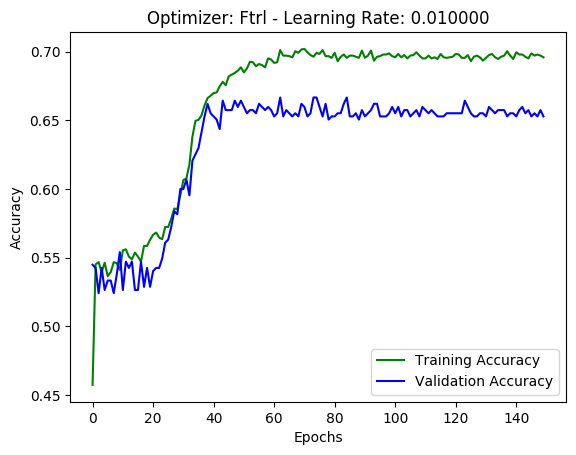

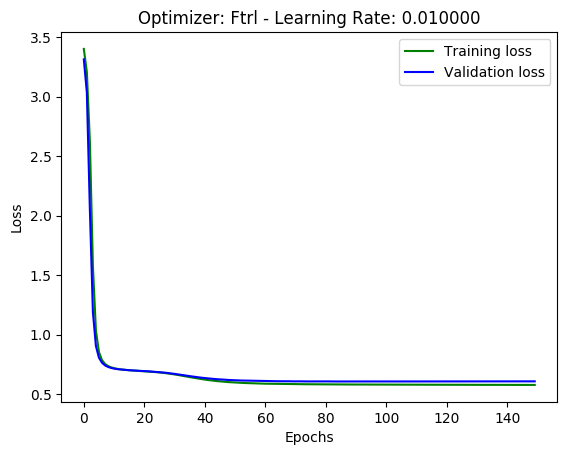

The training accuracyis: 0.6901554465293884
The training loss is: 0.5795775604165692
The test sccuracy is: 0.6726519337016574
Train RMSE: 0.76 RMSE
Test RMSE: 0.77 RMSE

2895/2895 [==============================] - 0s 23us/sample - loss: 0.4777 - accuracy: 0.7696


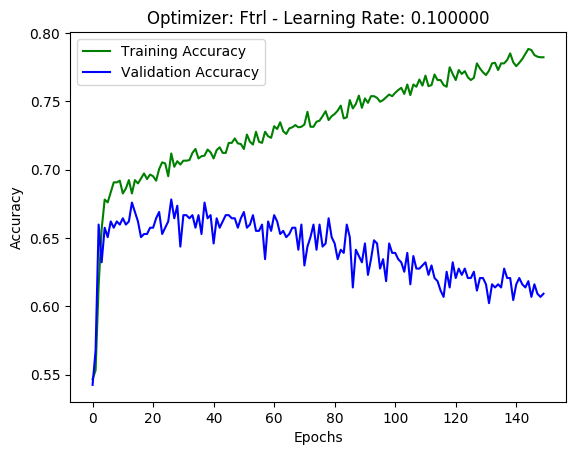

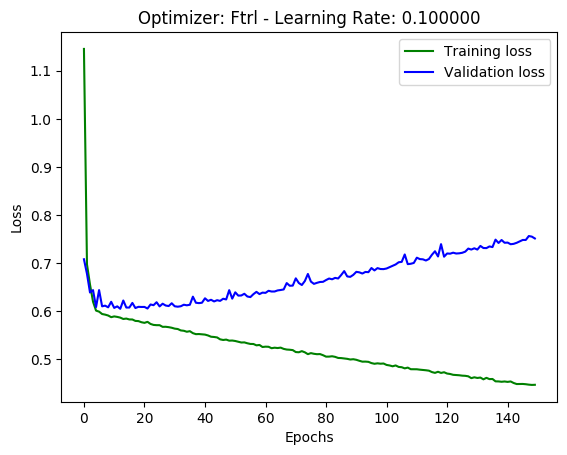

The training accuracyis: 0.7696027755737305
The training loss is: 0.4777247440217896
The test sccuracy is: 0.6408839779005525
Train RMSE: 0.69 RMSE
Test RMSE: 0.83 RMSE

2895/2895 [==============================] - 0s 22us/sample - loss: 0.5153 - accuracy: 0.8207


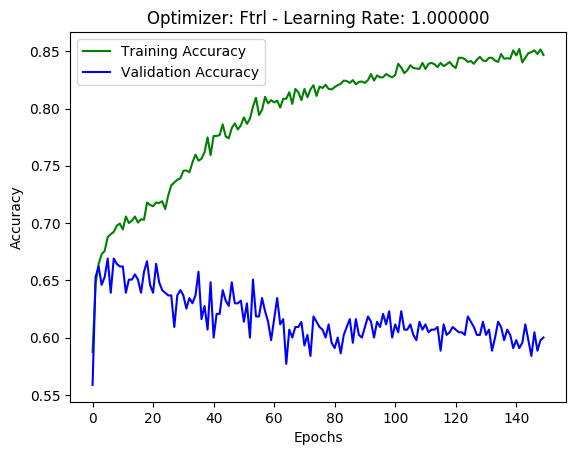

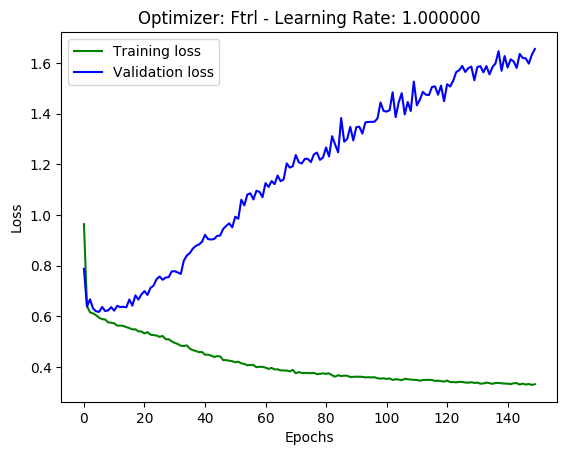

The training accuracyis: 0.8207253813743591
The training loss is: 0.5153234820291785
The test sccuracy is: 0.611878453038674
Train RMSE: 0.72 RMSE
Test RMSE: 1.15 RMSE



In [677]:
# List of optimizers and learning rates to be looped through
list_optimizers = ['Adam', 'SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Number of epochs per model
nn_epochs = 150

# Validation Split
val_split = 0.15

# Initializing a DataFrame to save each model results
nn_results = pd.DataFrame()

# Loop
for opt in list_optimizers:
    for lr in learning_rates:
        
        # Building a multilayer neural network using Keras
        model = Sequential()
        model.add(Dense(68, input_dim = dims, activation = 'relu'))
        model.add(Dense(34, activation = 'softmax'))
        
        # Compile the model to provide the training parameters
        model.compile(optimizer = select_optimizer(opt, lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        
        # Train the model
        nn_history = model.fit(X_train, y_train, epochs = nn_epochs, verbose = 0, validation_split = val_split)
        
        # Evaluate the trained model
        nn_eval = model.evaluate(X_train, y_train)
        
        # Preicting using the testing data
        y_test_pred = model.predict_classes(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'epochs': nn_epochs,
                   'validation_split': val_split,
                   'training accuracy': nn_eval[1],
                   'training loss': nn_eval[0],
                   'testing accuracy': test_accuracy,
                   'optimizer': str(opt),
                   'learning_rate': lr
                   }
        nn_results = nn_results.append(new_row, ignore_index = True)
        
        # Plot Accuracy
        loss_train = nn_history.history['accuracy']
        loss_val = nn_history.history['val_accuracy']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, loss_train, 'g', label = 'Training Accuracy')
        plt.plot(epochs, loss_val, 'b', label = 'Validation Accuracy')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        #plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
        # Plot Loss
        loss_train = nn_history.history['loss']
        loss_val = nn_history.history['val_loss']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, loss_train, 'g', label = 'Training loss')
        plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        #plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Evaluate the trained model
        print(f"The training accuracyis: {nn_eval[1]}")
        print(f"The training loss is: {nn_eval[0]}")
        print(f"The test sccuracy is: {test_accuracy}")
        get_rmse(model)
        print()

In [678]:
nn_results.head(50)

epochs  learning_rate optimizer  testing accuracy  training accuracy  training loss  validation_split
0    150.0         0.0001      Adam          0.676796           0.710190       0.550142              0.15
1    150.0         0.0010      Adam          0.611878           0.879447       0.333868              0.15
2    150.0         0.0100      Adam          0.602210           0.918826       0.510257              0.15
3    150.0         0.1000      Adam          0.635359           0.767876       0.855822              0.15
4    150.0         1.0000      Adam          0.428177           0.453541       0.695248              0.15
5    150.0         0.0001       SGD          0.560773           0.543696       2.070808              0.15
6    150.0         0.0010       SGD          0.633978           0.624525       0.674993              0.15
7    150.0         0.0100       SGD          0.674033           0.705700       0.564312              0.15
8    150.0         0.1000       SGD          0.580110           0.716753       0.766744              0.15
9    150.0         1.0000       SGD          0.602210           0.874611       0.499396              0.15
10   150.0         0.0001  Adadelta          0.004144           0.003800       3.612290              0.15
11   150.0         0.0010  Adadelta          0.520718           0.545769       2.841975              0.15
12   150.0         0.0100  Adadelta          0.632597           0.635924       0.671186              0.15
13   150.0         0.1000  Adadelta          0.672652           0.711572       0.554041              0.15
14   150.0         1.0000  Adadelta          0.614641           0.836615       0.393206              0.15
15   150.0         0.0001   RMSprop          0.665746           0.706390       0.559635              0.15
16   150.0         0.0010   RMSprop          0.625691           0.832470       0.401335              0.15
17   150.0         0.0100   RMSprop          0.581492           0.924698       0.674973              0.15
18   150.0         0.1000   RMSprop          0.566298           0.785492       1.097752              0.15
19   150.0         1.0000   RMSprop          0.430939           0.452850       0.791958              0.15
20   150.0         0.0001   Adagrad          0.372928           0.354059       3.058262              0.15
21   150.0         0.0010   Adagrad          0.651934           0.646978       0.759750              0.15
22   150.0         0.0100   Adagrad          0.668508           0.709845       0.556695              0.15
23   150.0         0.1000   Adagrad          0.596685           0.883247       0.350840              0.15
24   150.0         1.0000   Adagrad          0.610497           0.916062       0.573724              0.15
25   150.0         0.0001    Adamax          0.672652           0.700864       0.581383              0.15
26   150.0         0.0010    Adamax          0.661602           0.761658       0.490241              0.15
27   150.0         0.0100    Adamax          0.618785           0.912953       0.331825              0.15
28   150.0         0.1000    Adamax          0.617403           0.925043       0.685307              0.15
29   150.0         1.0000    Adamax          0.614641           0.712953       0.812362              0.15
30   150.0         0.0001     Nadam          0.671271           0.712608       0.551541              0.15
31   150.0         0.0010     Nadam          0.621547           0.871848       0.357710              0.15
32   150.0         0.0100     Nadam          0.591160           0.918135       0.578430              0.15
33   150.0         0.1000     Nadam          0.566298           0.755095       0.859937              0.15
34   150.0         1.0000     Nadam          0.428177           0.453541       0.707653              0.15
35   150.0         0.0001      Ftrl          0.558011           0.546114       3.480878              0.15
36   150.0         0.0010      Ftrl          0.577348           0.544041       0.8